# TPC-C Multi-Tenant with Distributed PVC and Tuned PostgreSQL 17.5

* data is generated and loaded into databases in a distributed filesystem
* experiments do not use preloaded data

* PostgreSQL uses improved args:
```
# --- Connection & Worker Processes ---
- "-c"
- "max_connections=1500"       # https://www.postgresql.org/docs/current/runtime-config-connection.html#GUC-MAX-CONNECTIONS
- "-c"
- "max_worker_processes=128"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-WORKER-PROCESSES
- "-c"
- "max_parallel_workers=64"    # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS
- "-c"
- "max_parallel_workers_per_gather=8"  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-WORKERS-PER-GATHER
- "-c"
- "max_parallel_maintenance_workers=8" # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-PARALLEL-MAINTENANCE-WORKERS

# --- Memory Settings ---
- "-c"
- "shared_buffers=256GB"       # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-SHARED-BUFFERS
- "-c"
- "effective_cache_size=350GB" # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-EFFECTIVE-CACHE-SIZE
- "-c"
- "work_mem=128MB"             # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-WORK-MEM
- "-c"
- "maintenance_work_mem=4GB"   # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAINTENANCE-WORK-MEM
- "-c"
- "temp_buffers=64MB"          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-TEMP-BUFFERS
- "-c"
- "wal_buffers=16MB"           # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-BUFFERS
- "-c"
- "autovacuum_work_mem=1GB"    # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-WORK-MEM

# --- Autovacuum ---
- "-c"
- "autovacuum=on"                            # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM
- "-c"
- "autovacuum_max_workers=10"               # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-MAX-WORKERS
- "-c"
- "autovacuum_vacuum_cost_limit=1000"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-LIMIT
- "-c"
- "vacuum_cost_limit=1000"                  # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-VACUUM-COST-LIMIT
- "-c"
- "autovacuum_naptime=15s"                  # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-NAPTIME
- "-c"
- "autovacuum_vacuum_cost_delay=20ms"       # https://www.postgresql.org/docs/current/runtime-config-autovacuum.html#GUC-AUTOVACUUM-VACUUM-COST-DELAY

# --- WAL & Checkpoints (Ceph-optimized) ---
- "-c"
- "wal_level=replica"                       # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-LEVEL
- "-c"
- "wal_compression=on"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-COMPRESSION
- "-c"
- "wal_writer_delay=500ms"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-WAL-WRITER-DELAY
- "-c"
- "commit_delay=10000"                      # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-COMMIT-DELAY
- "-c"
- "synchronous_commit=off"                  # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-SYNCHRONOUS-COMMIT
- "-c"
- "max_wal_size=2GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MAX-WAL-SIZE
- "-c"
- "min_wal_size=1GB"                        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-MIN-WAL-SIZE
- "-c"
- "checkpoint_timeout=15min"                # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-TIMEOUT
- "-c"
- "checkpoint_completion_target=0.9"        # https://www.postgresql.org/docs/current/runtime-config-wal.html#GUC-CHECKPOINT-COMPLETION-TARGET

# --- Planner Cost Tweaks (CephFS) ---
- "-c"
- "random_page_cost=4.0"                    # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-RANDOM-PAGE-COST
- "-c"
- "seq_page_cost=1.5"                       # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-SEQ-PAGE-COST
- "-c"
- "cpu_tuple_cost=0.01"                     # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-CPU-TUPLE-COST
- "-c"
- "effective_io_concurrency=2"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-EFFECTIVE-IO-CONCURRENCY
- "-c"
- "default_statistics_target=500"           # https://www.postgresql.org/docs/current/runtime-config-query.html#GUC-DEFAULT-STATISTICS-TARGET

# --- Locks and Limits ---
- "-c"
- "max_locks_per_transaction=128"           # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-LOCKS-PER-TRANSACTION
- "-c"
- "max_pred_locks_per_transaction=128"      # https://www.postgresql.org/docs/current/runtime-config-locks.html#GUC-MAX-PRED-LOCKS-PER-TRANSACTION
- "-c"
- "max_stack_depth=7MB"                     # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-STACK-DEPTH
- "-c"
- "max_files_per_process=4000"              # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-MAX-FILES-PER-PROCESS

# --- Miscellaneous ---
- "-c"
- "huge_pages=try"                          # https://www.postgresql.org/docs/current/runtime-config-resource.html#GUC-HUGE-PAGES
```

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from bexhoma import collectors

%matplotlib inline

# Functions for Nice Plots

In [2]:
def sanitize_filename(title, max_length=100):
    # Replace non-alphanumeric characters with underscores
    safe = re.sub(r'[^a-zA-Z0-9-_]+', '_', title.strip())
    # Truncate to a safe length
    return safe[:max_length].rstrip('_')
    
def plot_bars(df, y, title, estimator):
    df_plot = df.copy()
    #df_plot = df_plot[df_plot['client']=='1']
    df_plot = df_plot.sort_values(['num_tenants','type'])
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df_plot,
        x='num_tenants',
        y=y,
        hue='type',
        estimator=estimator,
        palette='Set2',
        hue_order=hue_order
    )
    show_height = False
    if show_height:
        for bar in ax.patches:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # X: center of bar
                    height,                             # Y: top of bar
                    f'{height:.1f}',                    # Text (1 decimal place)
                    ha='center', va='bottom', fontsize=8
                )
    # Get tick positions (i.e., the x-axis categories)
    xticks = ax.get_xticks()
    bar_width = ax.patches[0].get_width()
    # Create a mapping from (num_tenants, type) to hatch
    grouped = df_plot.groupby(['num_tenants', 'type']).agg({y: estimator}).reset_index()
    #print(grouped)
    grouped_dict = {(row['num_tenants'], row['type']): hatch_map[row['type']] for _, row in grouped.iterrows()}
    bars = sorted(ax.patches, key=lambda bar: bar.get_x() if bar.get_height() > 0 else 10000)
    for bar, (_, row) in zip(bars, grouped.iterrows()):
        bar.my_id = (row['num_tenants'], row['type'])  # or anything else like an index or uuid
        bar.set_hatch(hatch_map[row['type']]) #grouped_dict[(bar.my_id)])
        bar.set_edgecolor('black')
        bar.set_linewidth(1)
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
    # Final touches
    plt.legend(title='Type')
    ax.legend(fontsize=18)
    #ax.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))  # move outside
    plt.title(f"{title}", fontsize=24)
    #plt.title(f"{title} by Number of Tenants and Type", fontsize=24)
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    # Remove y-axis label
    ax.set_ylabel('')  # or ax.set(ylabel='')
    plt.tight_layout()
    if b_plot_save:
        filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
        plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

def plot_boxplots(df, y, title):
    plt.figure(figsize=(10, 6))
    # Hatch styles for each type
    hatch_map = {
        'container': '/',
        'database': '\\',
        'schema': 'x'
    }
    hue_order = ['container', 'database', 'schema']
    
    # Plot boxplots grouped by num_tenants and colored by type
    ax = sns.boxplot(
        data=df,
        x='num_tenants',
        y=y,#'Goodput (requests/second)',
        hue='type',
        palette='Set2'  # consistent colors per type
    )
    # Add vertical separator lines between groups
    # Get the number of unique num_tenants and type
    num_groups = df['num_tenants'].nunique()
    num_types = df['type'].nunique()
    
    # Extract hue order
    hue_order = ax.get_legend_handles_labels()[1]
    num_hue = len(hue_order)
    
    # Get hue order from seaborn (types)
    _, type_order = ax.get_legend_handles_labels()
    num_types = len(type_order)
    
    #print(len(ax.patches))
    # Set hatches correctly: patches are grouped by x then by hue
    for i, patch in enumerate(ax.patches):
        #print(i)
        type_index = i // (num_groups)
        if type_index >= num_types:
            break
        type_name = type_order[type_index]
        patch.set_hatch(hatch_map.get(type_name, ''))
        #print(hatch_map.get(type_name, ''))
        patch.set_edgecolor('black')
        patch.set_linewidth(1)
    
    # Each num_tenants group has num_types boxes
    for i in range(1, num_groups):
        xpos = i - 0.5 #0.5
        ax.axvline(x=xpos, color='gray', linestyle='--', alpha=0.5)
    
    
    # Update legend with matching hatches
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        hatch = hatch_map.get(label, '')
        handle.set_hatch(hatch)
        handle.set_edgecolor('black')
        handle.set_linewidth(1)
    
    #title = "Goodput [req/s] Distribution per Tenant"
    plt.title(title, fontsize=24)
    plt.xlabel("Number of Tenants")
    plt.ylabel("")#"Goodput (requests/second)")
    plt.xlabel("Number of Tenants", fontsize=18)
    ax.tick_params(axis='both', labelsize=16)
    plt.legend(title="Type")
    ax.legend(fontsize=18)
    plt.tight_layout()
    if b_plot_save:
        filename = "tpcc_" + filename_prefix + sanitize_filename(title) + ".png"    
        plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

def plot_lines(df, y, title):
    plt.figure(figsize=(10, 6))

    # Consistent colors per type
    palette = {
        'container': '#66c2a5',
        'database': '#fc8d62',
        'schema': '#8da0cb'
    }
    hue_order = ['container', 'database', 'schema']
    
    # Plot lineplot grouped by num_tenants and colored by type

    ax = sns.lineplot(
        data=df.reset_index(),
        x="timestamp",
        y=y,
        hue="type",
        hue_order=hue_order,
        style="num_tenants",          # different line styles per type
        markers=False,          # markers at points
        dashes=True,
        estimator=None,   # plot raw data without aggregation
        errorbar=None,
        #fill=False,         # <- this disables area fill!
        #ci=None,
        palette=palette
    )

    # Axis labels and title
    plt.title(title, fontsize=24)
    plt.xlabel("Second", fontsize=18)
    #plt.ylabel(y, fontsize=18)
    ax.set(ylabel=None)
    ax.tick_params(axis='both', labelsize=16)

    # Legend formatting
    plt.legend(fontsize=16, title_fontsize=18)
    
    # Save
    if b_plot_save:
        filename = "tpcc_" + filename_prefix + "_" + title.replace(" ", "_") + ".png"
        plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

#print("Seaborn version:", sns.__version__)

# Collect Results

In [3]:
path = r"C:\data\benchmarks"
#path = r"/home/perdelt/benchmarks"
filename_prefix = "cpupolicy_"
b_plot_save = False

In [4]:
codes = [
    "1755712809", # container 1
    "1755709687", # database 1
    "1755706475", # schema 1

    "1755768953", # container 2
    "1755765631", # database 2
    "1755762327", # schema 2

    "1755723522", # container 3
    "1755720064", # database 3
    "1755716684", # schema 3

    "1755734267", # container 4
    "1755730711", # database 4
    "1755727170", # schema 4

    "1755745678", # container 5
    "1755741955", # database 5
    "1755738212", # schema 5

    "1755757763", # container 6
    "1755753878", # database 6
    "1755749972", # schema 6
]

codes

['1755712809',
 '1755709687',
 '1755706475',
 '1755768953',
 '1755765631',
 '1755762327',
 '1755723522',
 '1755720064',
 '1755716684',
 '1755734267',
 '1755730711',
 '1755727170',
 '1755745678',
 '1755741955',
 '1755738212',
 '1755757763',
 '1755753878',
 '1755749972']

In [5]:
collect = collectors.benchbase(path, codes)

# Get all Metrics Metadata

In [6]:
collect.df_metrics

title  \
total_cpu_memory                                                                             Memory Usage [MiB]   
total_cpu_memory_cached                                                               Memory Usage Cached [MiB]   
total_cpu_util                                                                              CPU Utilization [%]   
total_cpu_throttled                                                                            CPU Throttle [%]   
total_cpu_throttled_s                                                                    CPU Throttled Time [s]   
total_cpu_util_others                                                                CPU Utilization Others [%]   
total_cpu_util_s                                                                       CPU Utilization Time [s]   
total_cpu_util_user_s                                                                         CPU User Time [s]   
total_cpu_util_sys_s                                                                        CPU System Time [s]   
total_cpu_util_others_s                                                         CPU Utilization Time Others [s]   
total_network_rx                                                                         Network Rx Total [MiB]   
total_network_tx                                                                         Network Tx Total [MiB]   
total_fs_read                                                                       Filesystem Read Total [MiB]   
total_fs_write                                                                     Filesystem Write Total [MiB]   
total_gpu_util                                                                              GPU Utilization [%]   
total_gpu_power                                                                             GPU Power Usage [W]   
total_gpu_memory                                                                         GPU Memory Usage [MiB]   
core_variance                                                                     Core Utilization Variance [%]   
pg_stat_database_blks_read                                                               Disk Blocks Read Count   
pg_stat_database_blks_hit                                                                Buffer Cache Hit Count   
cache_hit_ratio                                                                          Buffer Cache Hit Ratio   
pg_statio_user_tables_heap_blocks_hit                                                    Table Buffer Hit Count   
pg_statio_user_tables_heap_blocks_read                                                  Table Blocks Read Count   
pg_stat_bgwriter_checkpoint_sync_time_total                                           Checkpoint Sync Time [ms]   
pg_stat_bgwriter_checkpoint_write_time_total                                         Checkpoint Write Time [ms]   
pg_stat_bgwriter_checkpoint_write_time_per_sync_time   Time spent writing vs syncing during checkpoints [ratio]   
pg_locks_count                                                                              Total Locks Current   
pg_locks_count_accessexclusivelock                                                 AccessExclusiveLocks Current   
pg_locks_count_accesssharelock                                                         AccessShareLocks Current   
pg_locks_count_exclusivelock                                                             ExclusiveLocks Current   
pg_locks_count_rowexclusivelock                                                       RowExclusiveLocks Current   
pg_locks_count_rowsharelock                                                               RowShareLocks Current   
pg_locks_count_sharelock                                                                     ShareLocks Current   
pg_locks_count_sharerowexclusivelock                                             ShareRowExclusiveLocks Current   
pg_locks_count_shareupdateexclusivelock                                       Sha

# Get Values Aggregated per SUT and per Experiment

In [7]:
df_performance = collect.get_monitoring_all(type="stream")
df_performance.T

0             1  \
client                                                       1             2   
Memory Usage [MiB]                                     10041.5      14915.16   
Memory Usage Cached [MiB]                             20115.85      30144.54   
CPU Utilization [%]                                      15.92         15.39   
CPU Throttle [%]                                           0.0           0.0   
CPU Throttled Time [s]                                     0.0           0.0   
CPU Utilization Time [s]                              20009.97      19021.29   
CPU User Time [s]                                     12787.23      12146.13   
CPU System Time [s]                                    7222.74       6875.16   
Core Utilization Variance [%]                             9.01          8.19   
Disk Blocks Read Count                                    72.0          34.0   
Buffer Cache Hit Count                            1549459926.0  1500589252.0   
Buffer Cache Hit Ratio                                     1.0           1.0   
Table Buffer Hit Count                             815254541.0   780661229.0   
Table Blocks Read Count                                   55.0          34.0   
Checkpoint Sync Time [ms]                                  0.0           0.0   
Checkpoint Write Time [ms]                                 0.0           0.0   
Total Locks Current                                    1003.38       1004.92   
AccessExclusiveLocks Current                              3.14          4.04   
AccessShareLocks Current                                328.29        327.22   
ExclusiveLocks Current                                   19.31         19.98   
RowExclusiveLocks Current                               330.02        334.92   
RowShareLocks Current                                   320.74        316.75   
ShareLocks Current                                         0.0           0.0   
ShareRowExclusiveLocks Current                             0.0           0.0   
ShareUpdateExclusiveLocks Current                         1.86           2.0   
SIReadLocks Current                                        0.0           0.0   
Autoanalyze Run Count                                    271.0         233.0   
Autovacuum Run Count                                     203.0         189.0   
Number of Idle Sessions                                   1.36          1.41   
Number of Idle-in-transaction Sessions                    24.3         21.63   
Number of Idle-in-transaction Aborted Sessions            0.01           0.0   
Number of Active Sessions                                104.0         104.0   
Longest Active Transaction                               17.39         35.85   
Longest Idle Session (no transaction)                      0.0           0.0   
Longest Idle-in-Transaction                                0.1          0.05   
Longest Idle-in-Transaction (Aborted)                      0.0           0.0   
Dead tuples per vacuum operation [tuples/vacuum]           inf           inf   
type                                                 container     container   
num_tenants                                                  1             1   
code                                                1755712809    1755712809   

                                                             0             1  \
client                                                       1             2   
Memory Usage [MiB]                                     9954.95      14696.05   
Memory Usage Cached [MiB]                             19278.99      28908.07   
CPU Utilization [%]                                       15.0         16.29   
CPU Throttle [%]                                           0.0           0.0   
CPU Throttled Time [s]                                     0.0           0.0   
CPU Utilization Time [s]                              18789.19      19963.08   
CPU User Time [s]                                     12478.

# Bar Plots of Aggregated Values per Metric

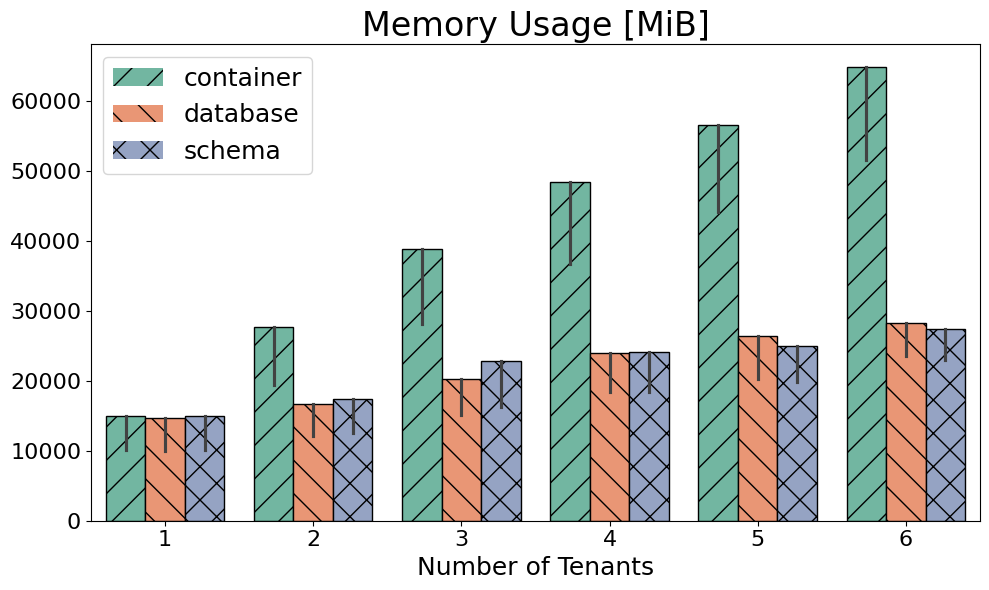

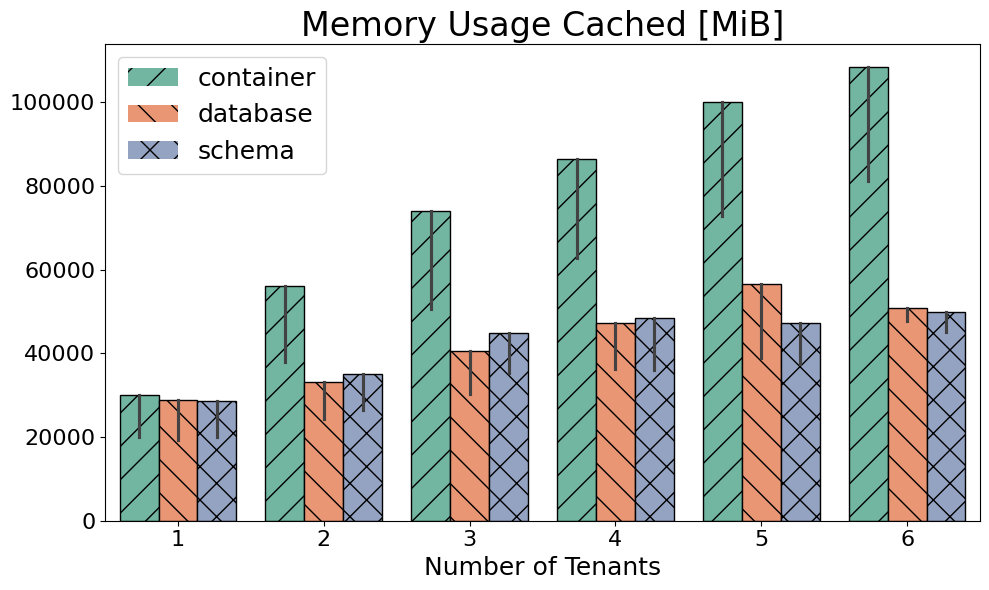

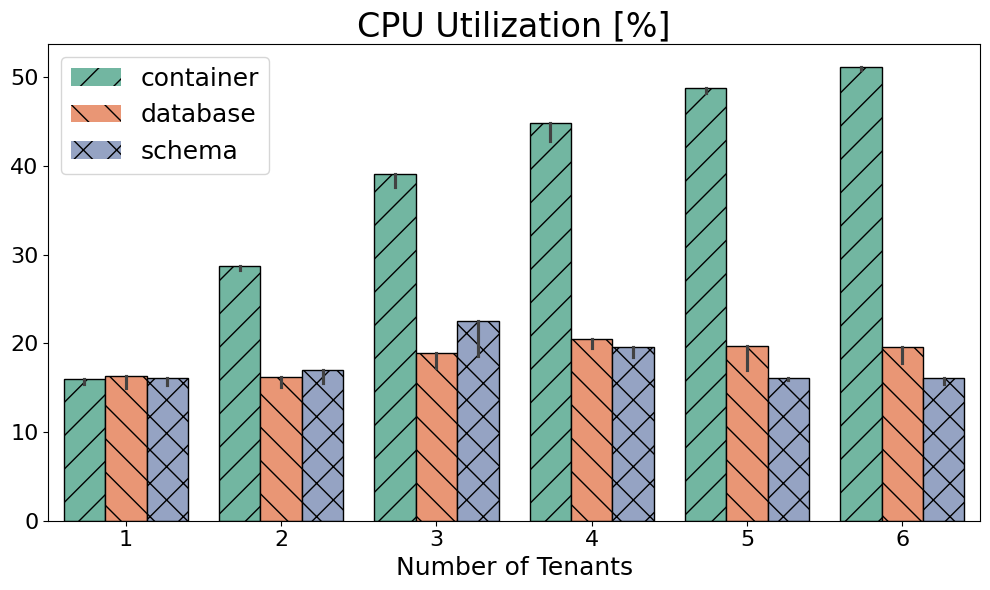

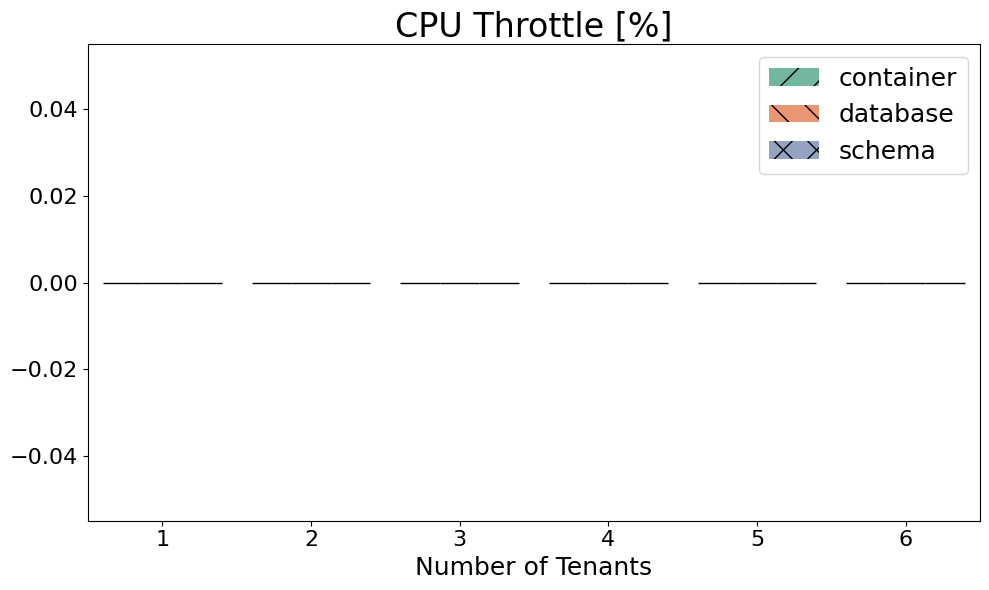

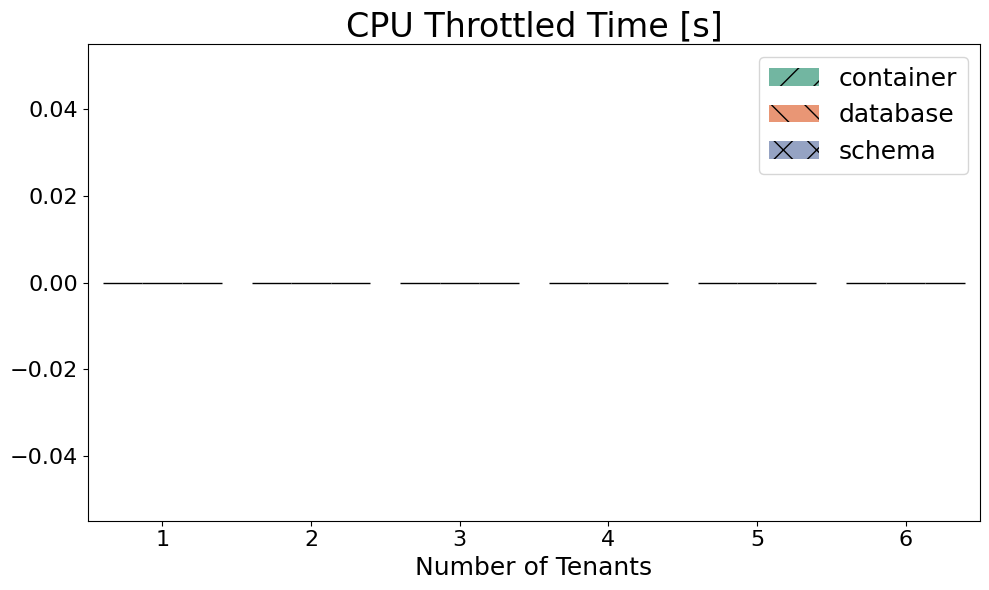

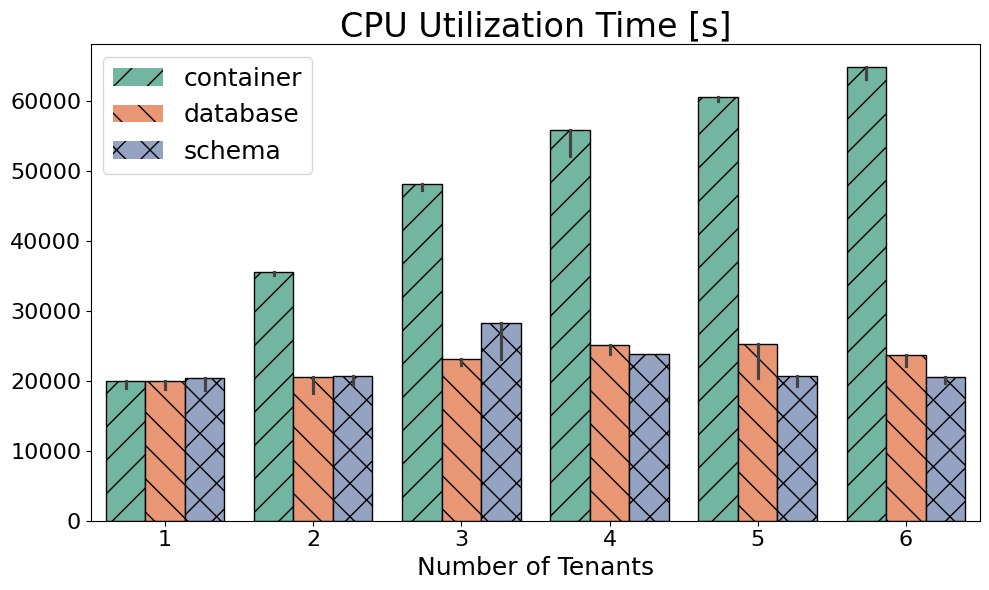

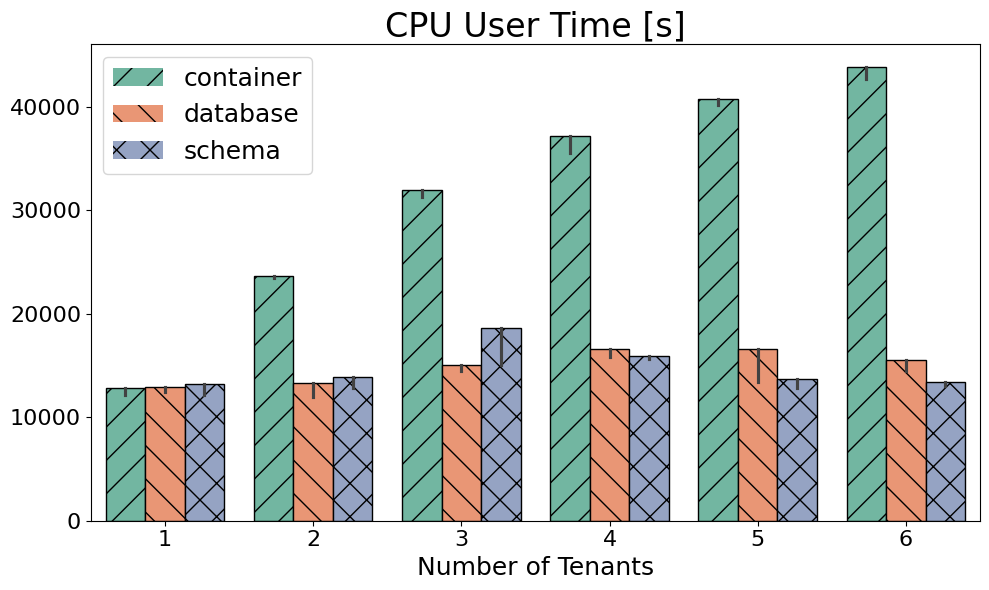

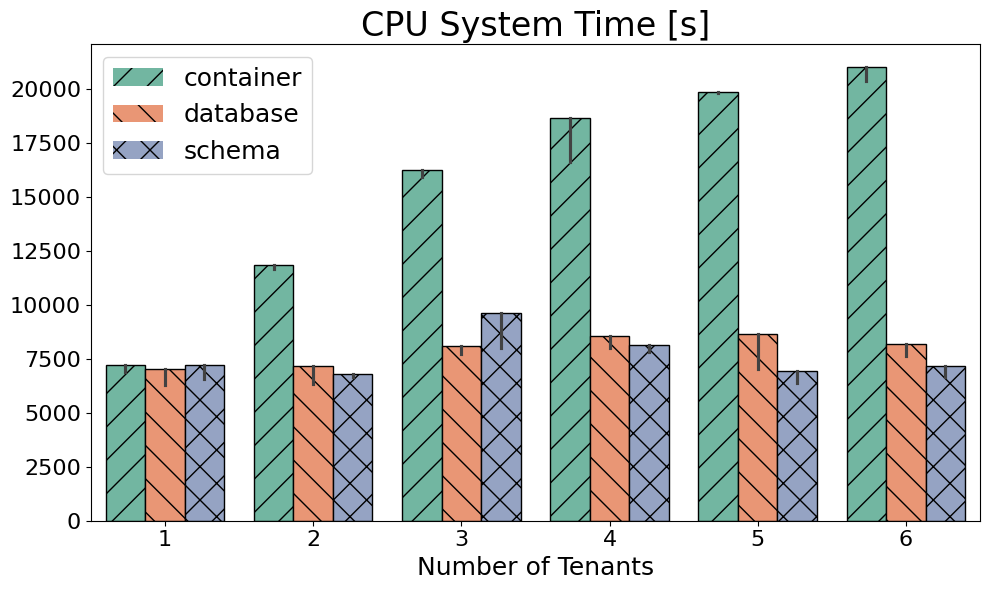

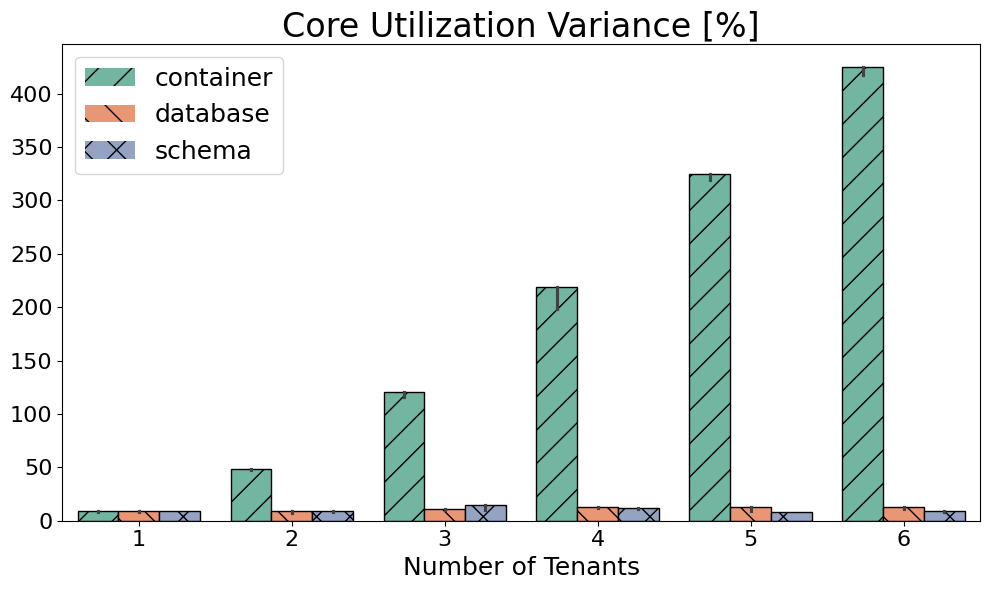

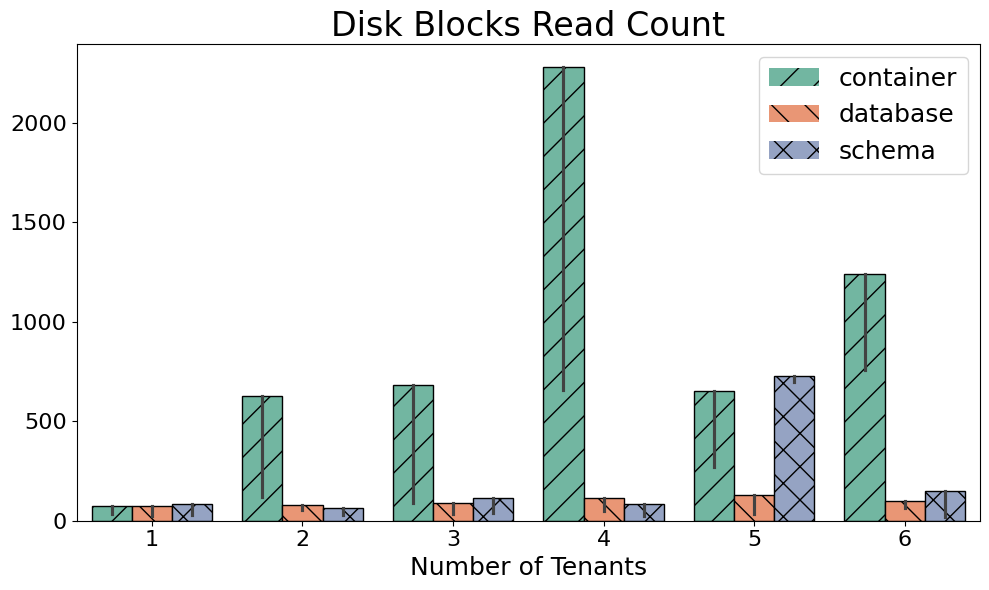

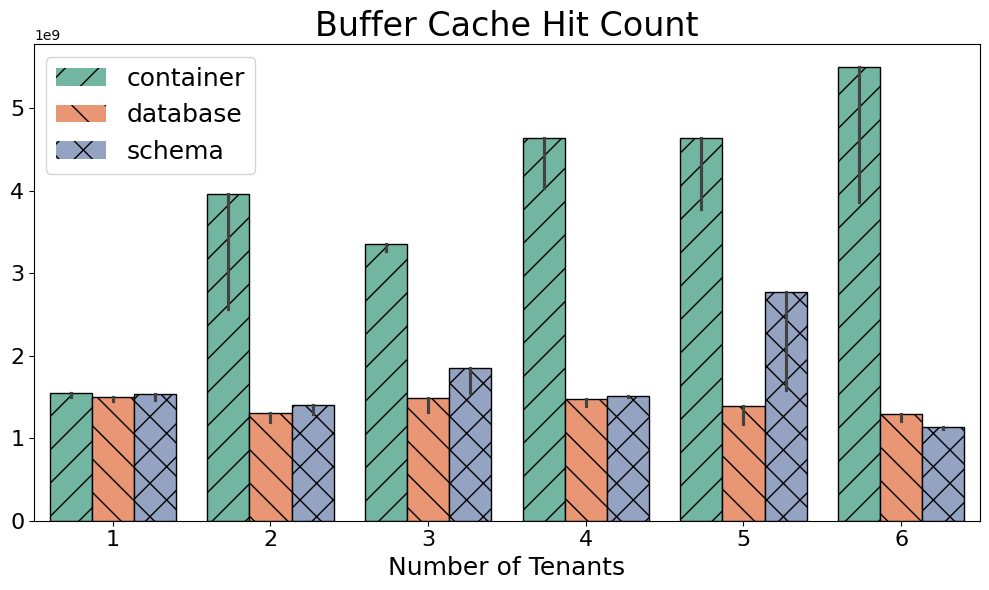

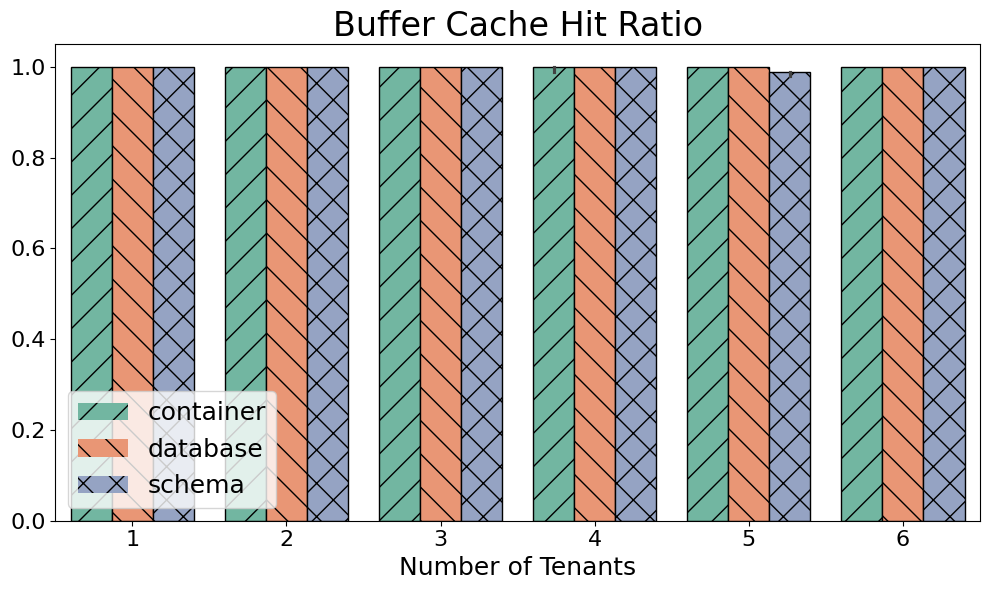

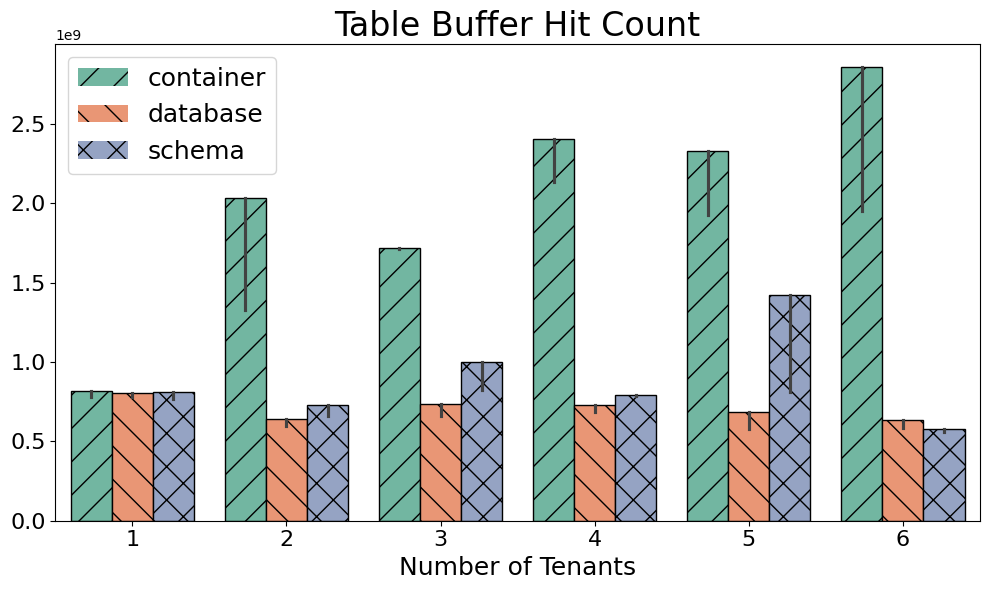

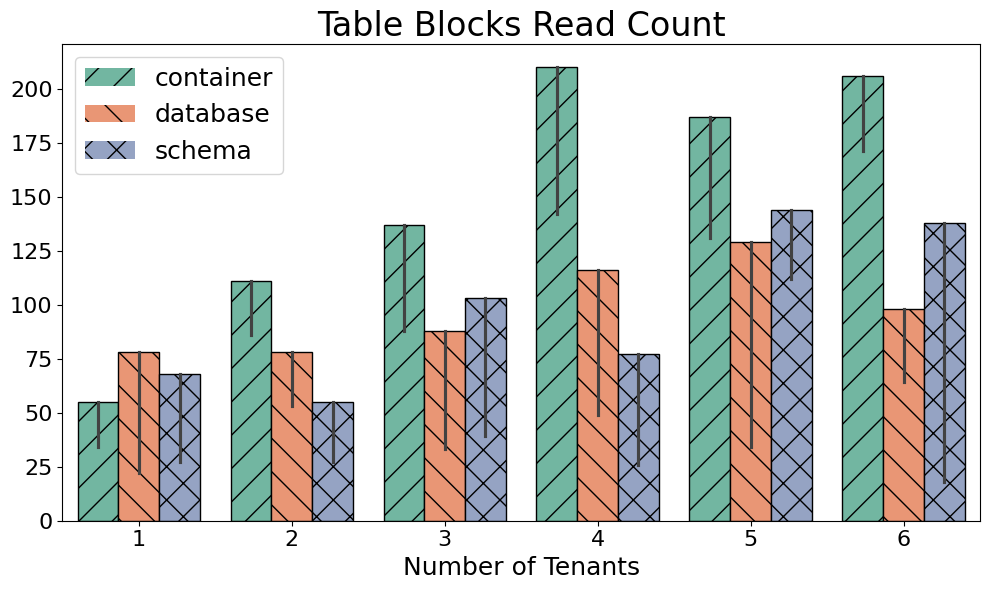

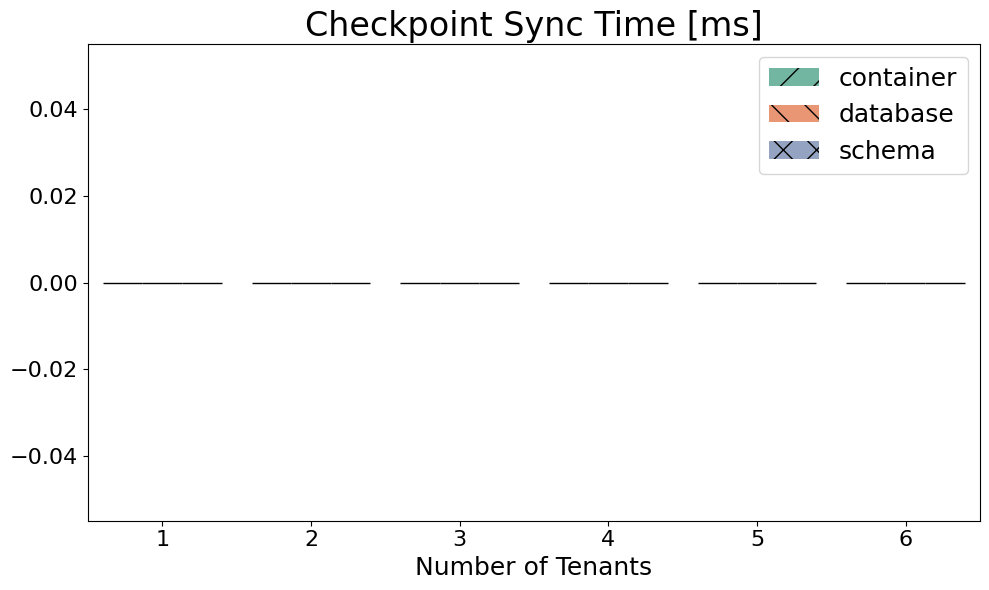

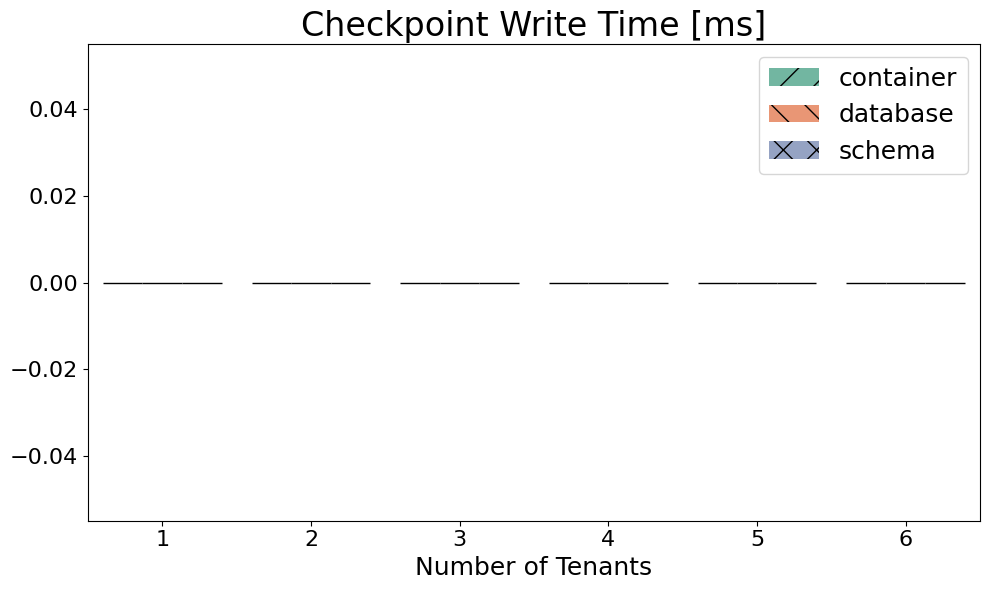

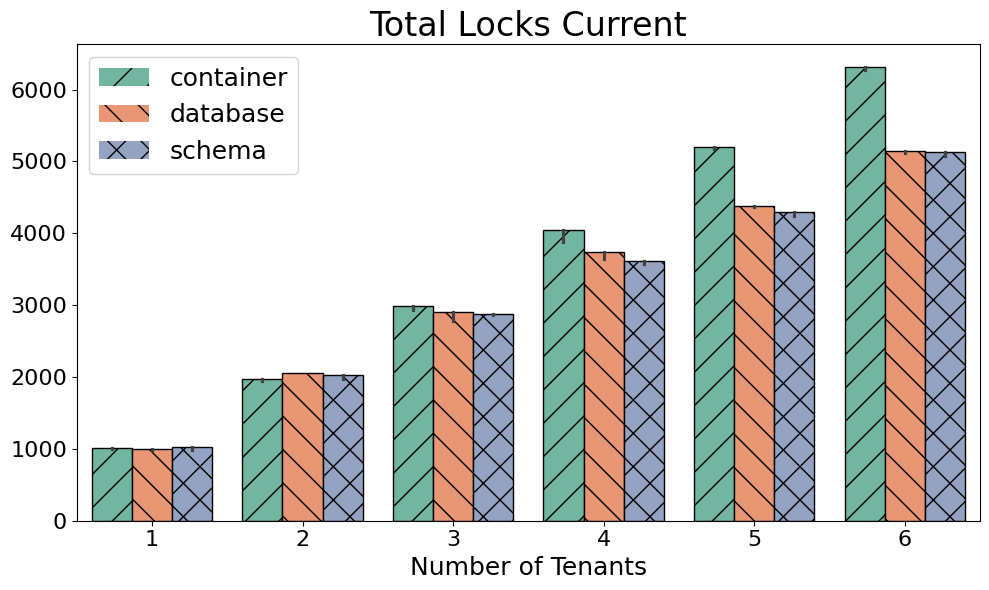

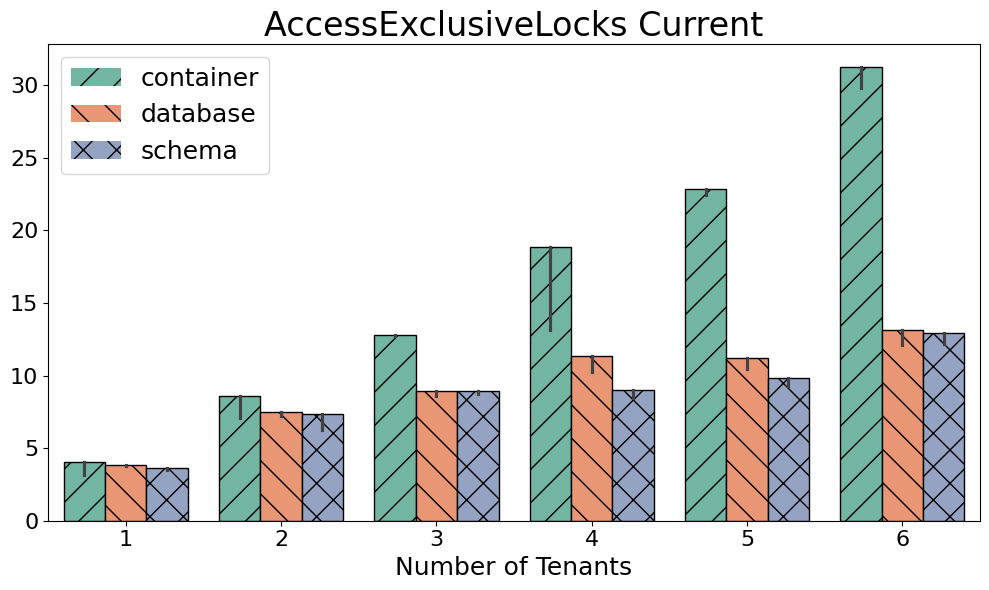

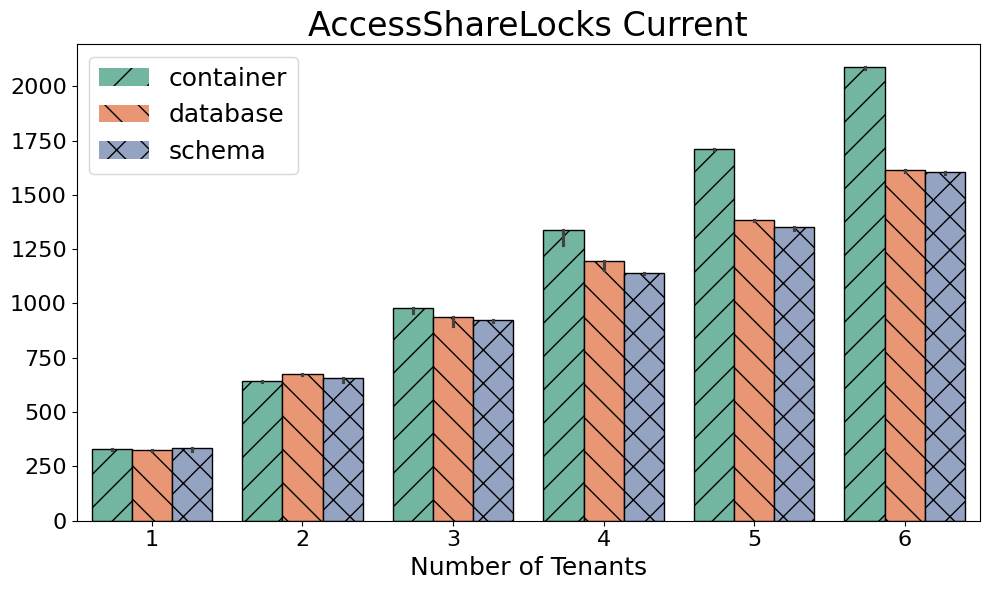

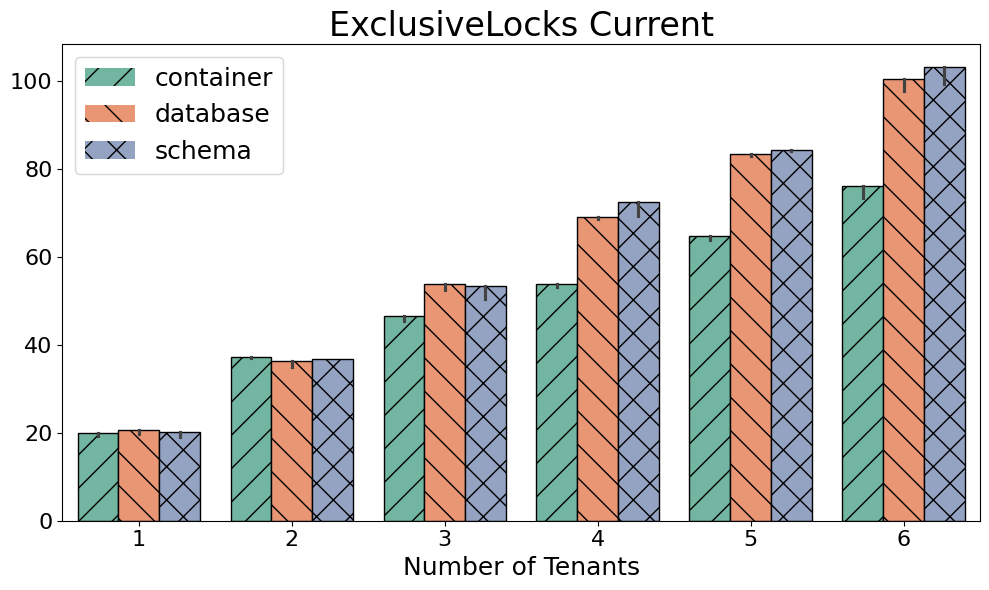

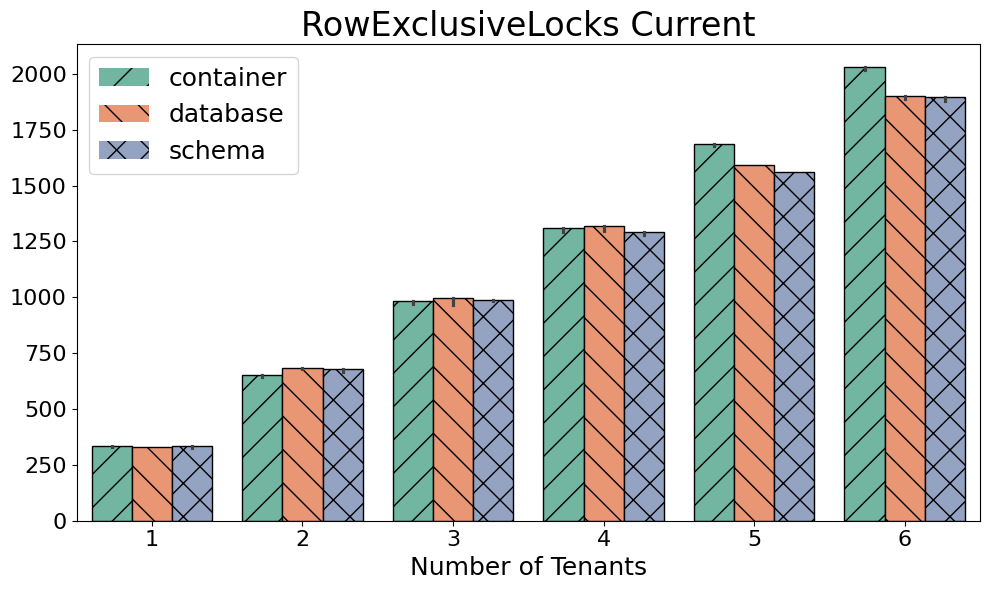

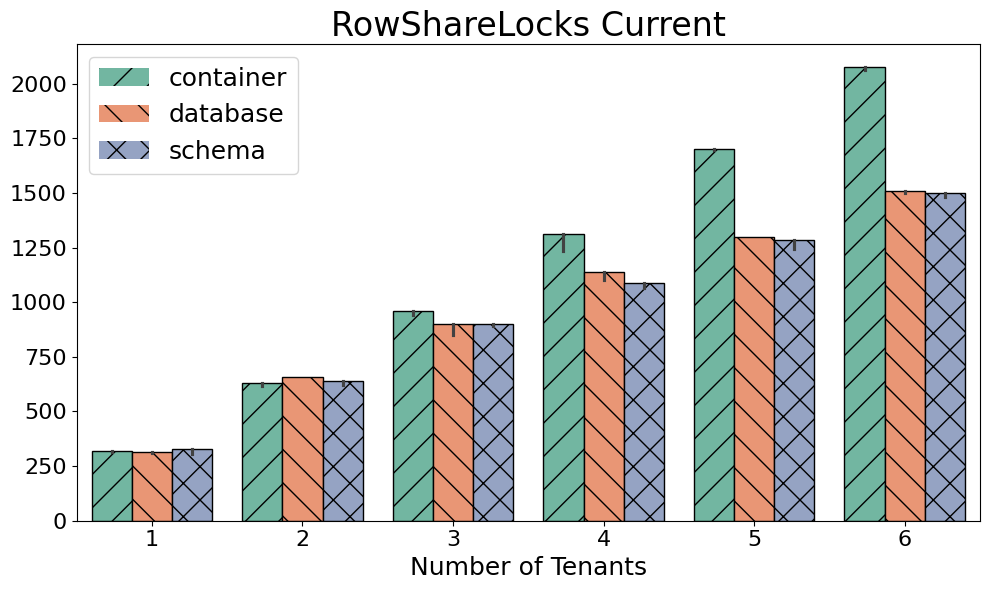

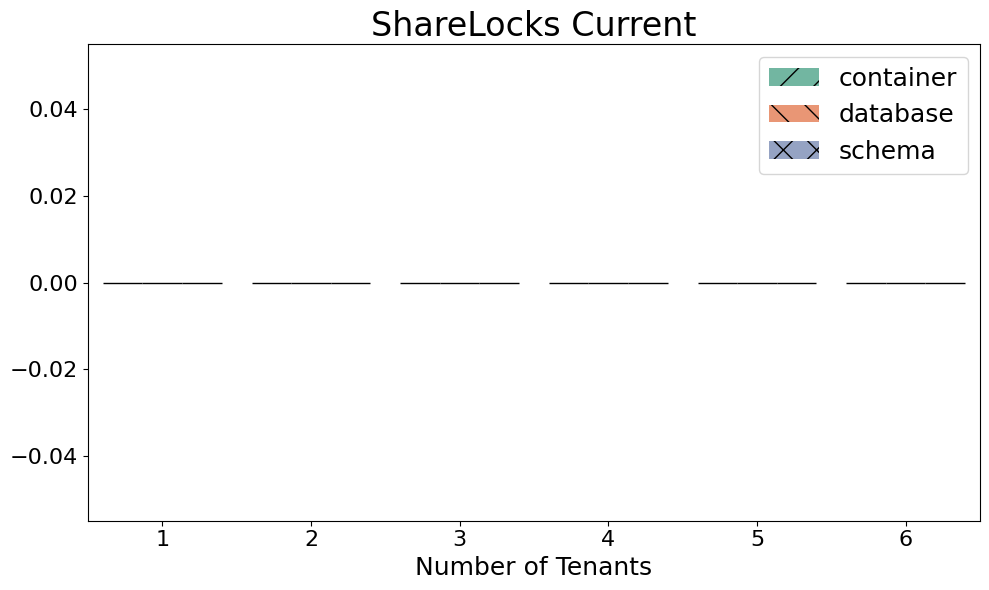

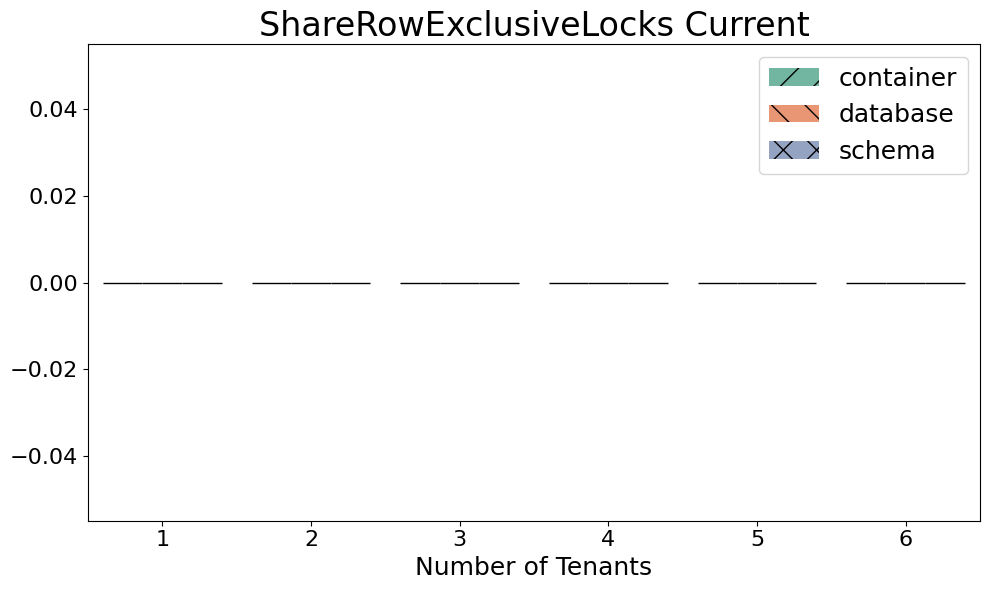

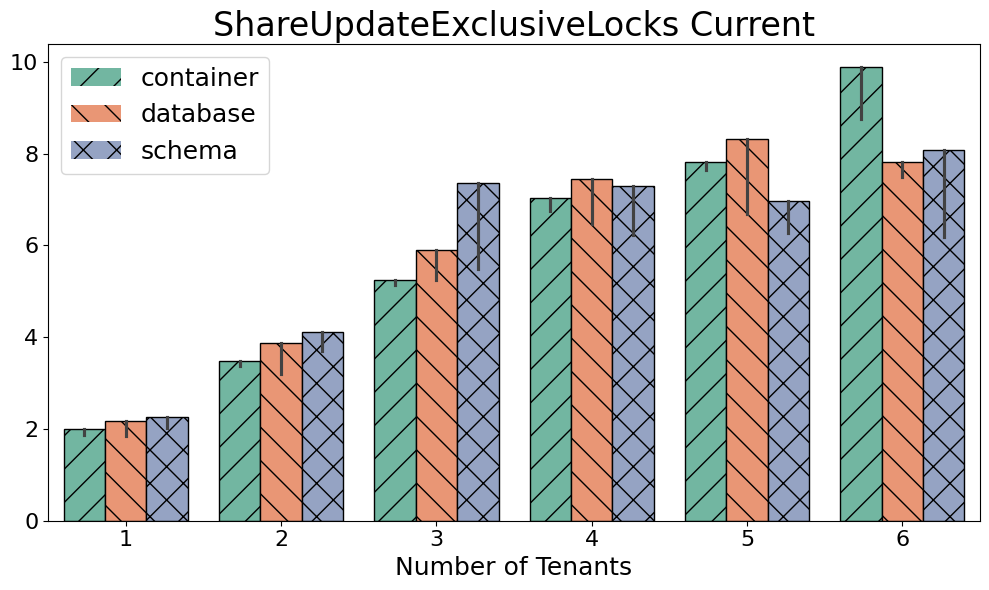

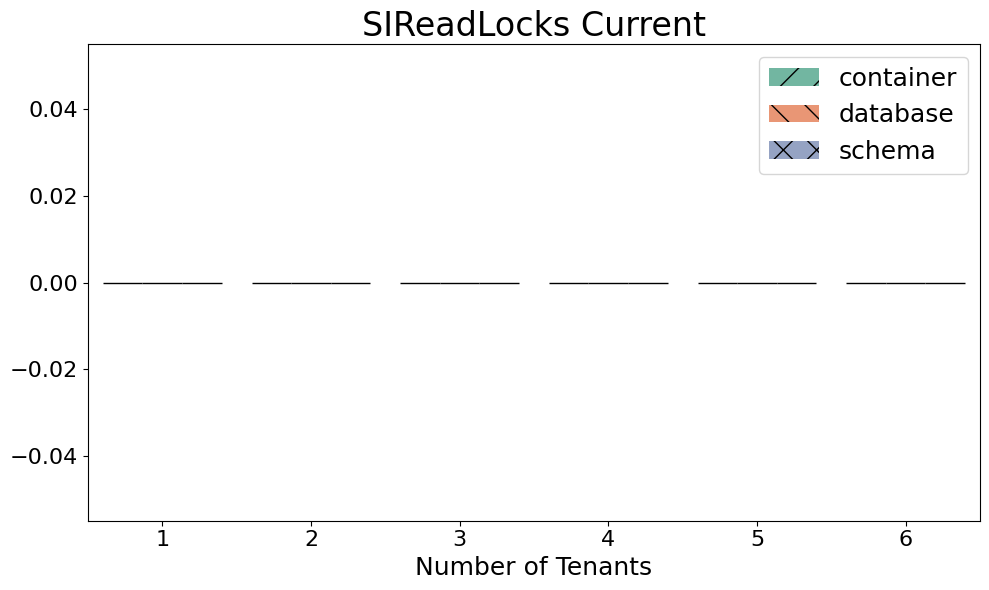

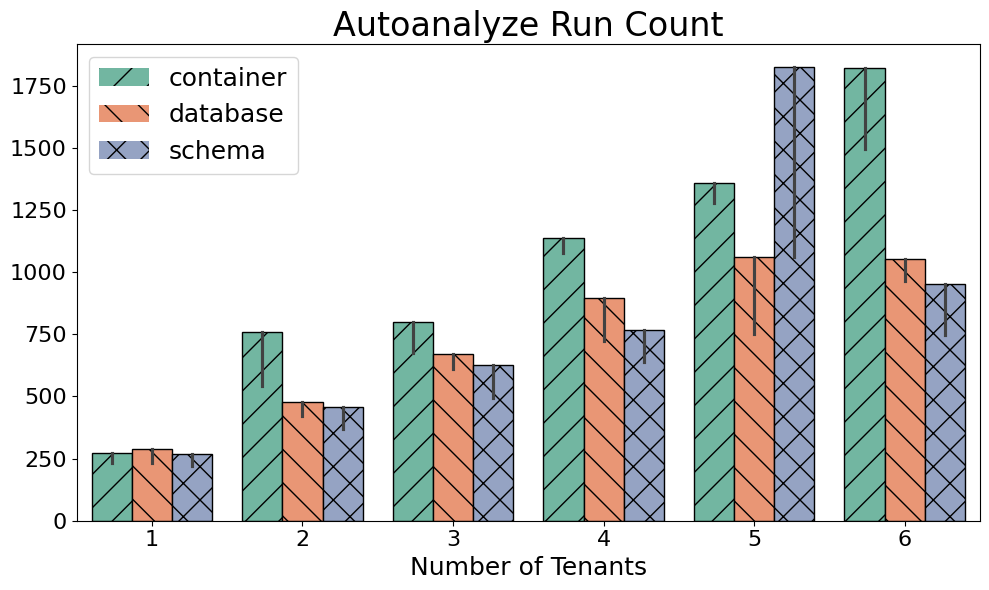

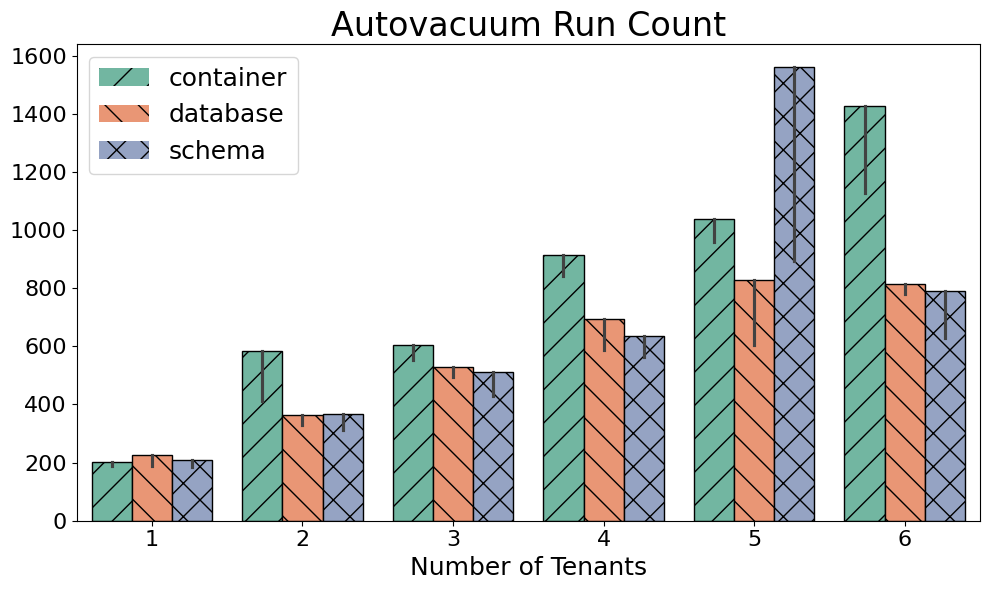

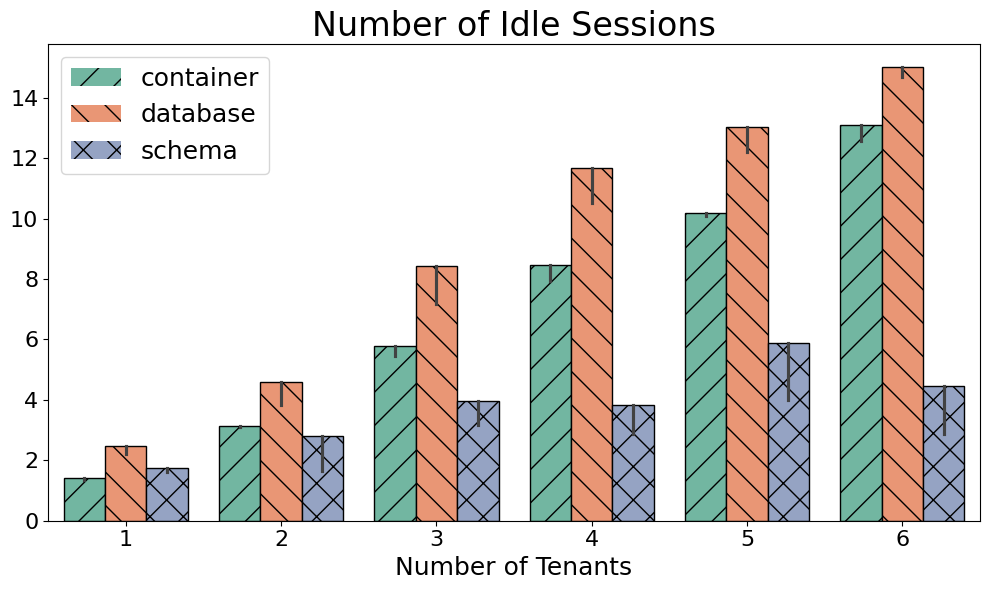

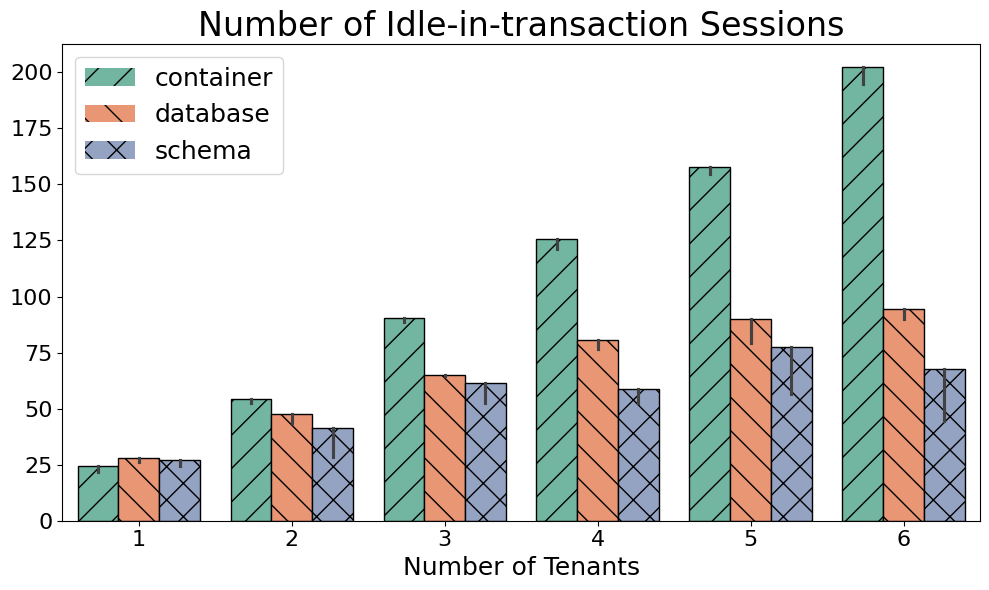

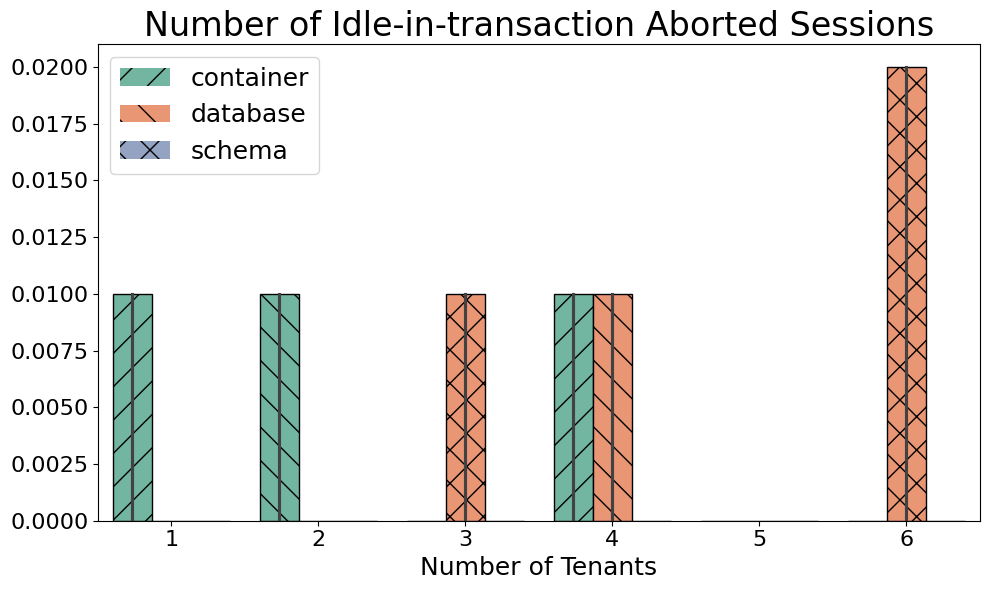

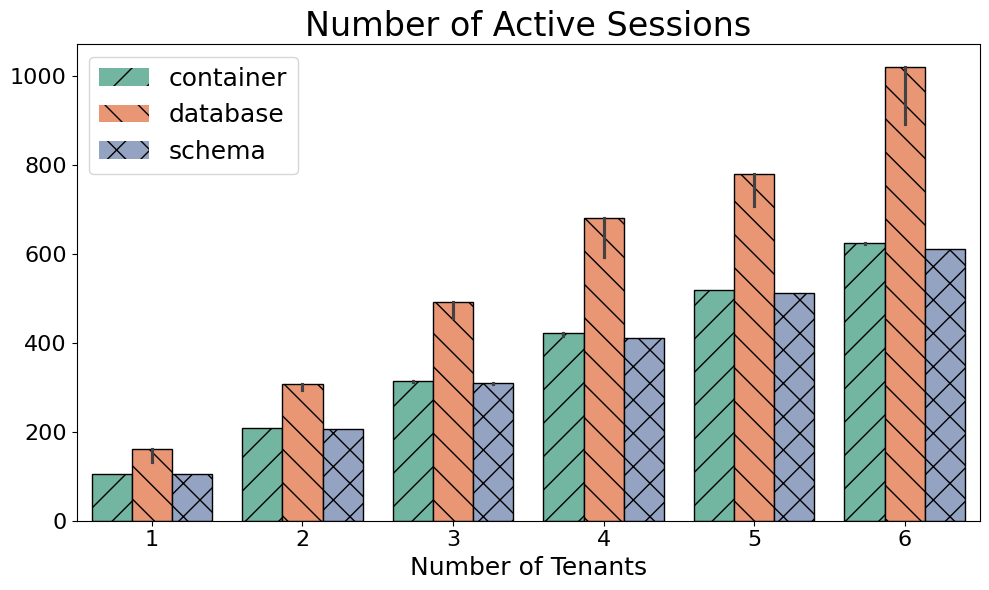

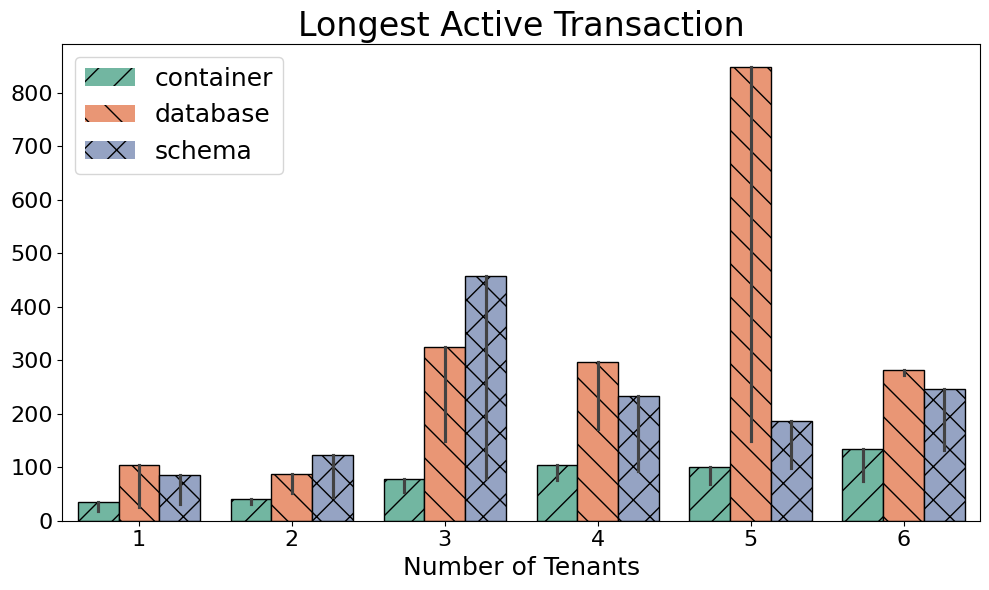

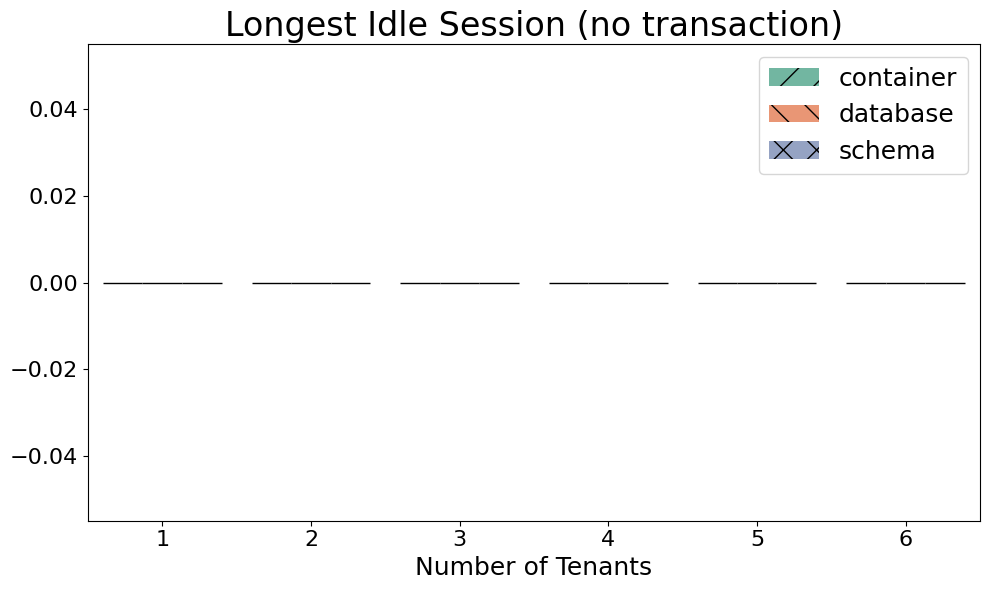

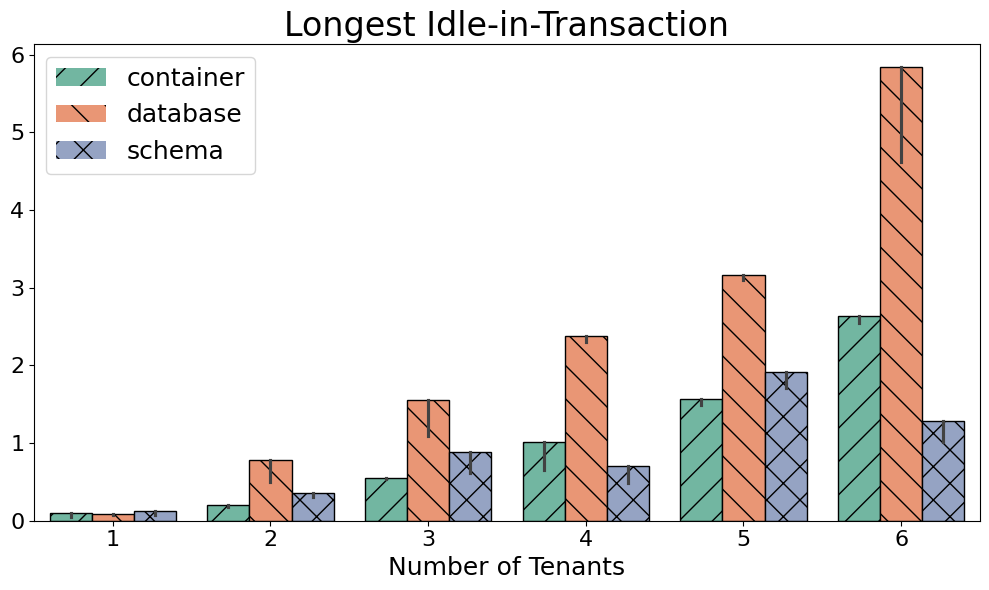

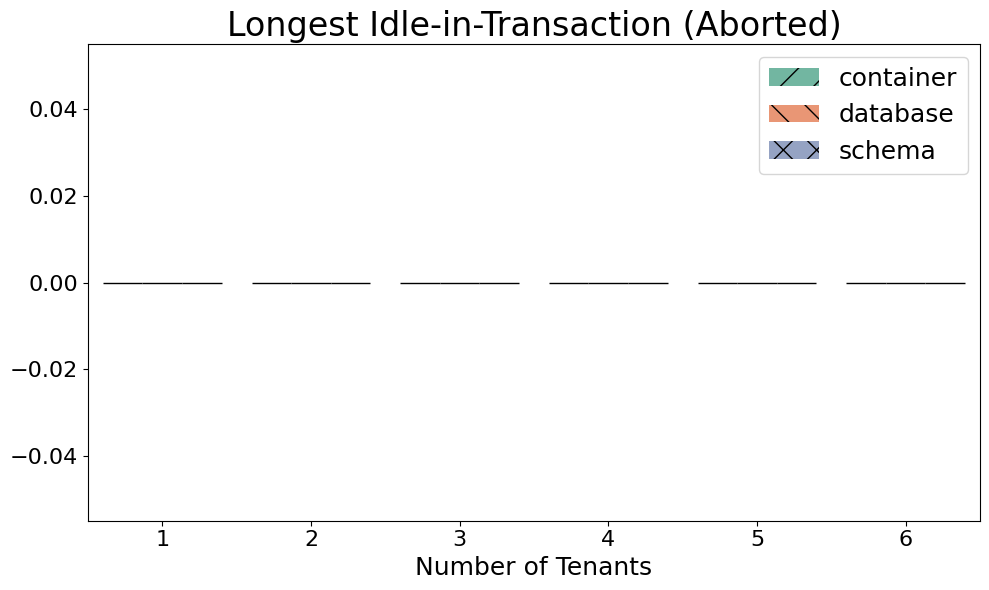

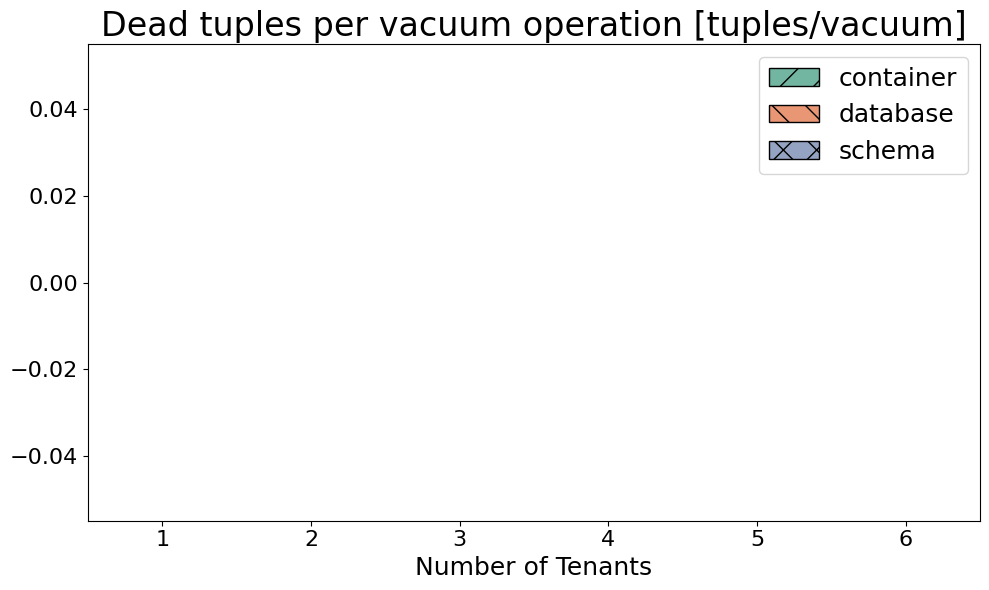

In [8]:
for idx, row in collect.df_metrics.iterrows():
    if row["active"] == False:
        continue
    col_name = row["title"]
    plot_bars(df_performance, y=col_name, title=col_name, estimator='max')

# Boxplot of All Metrics for a Single Experiment

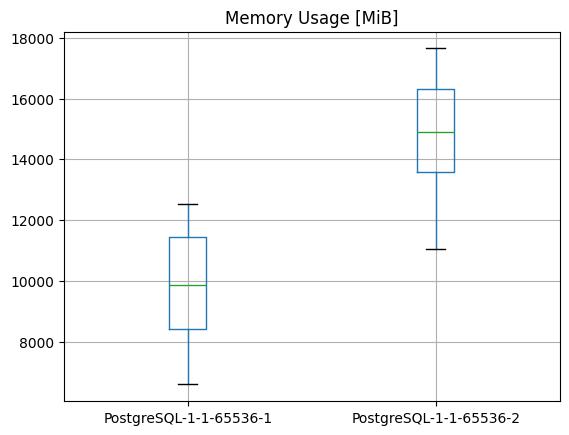

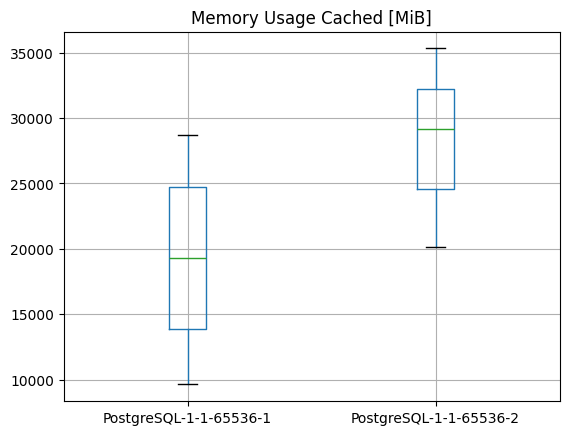

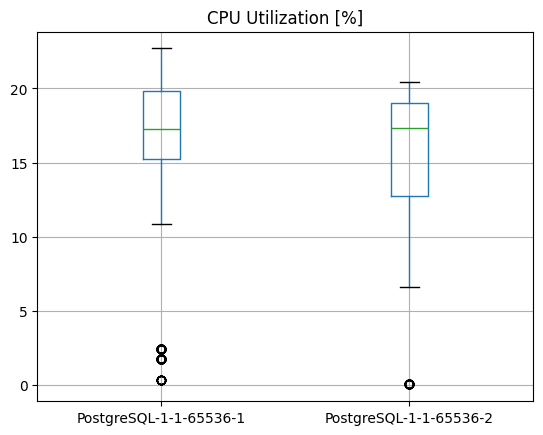

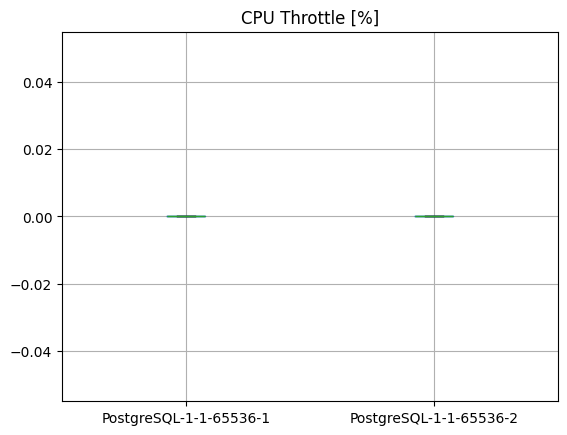

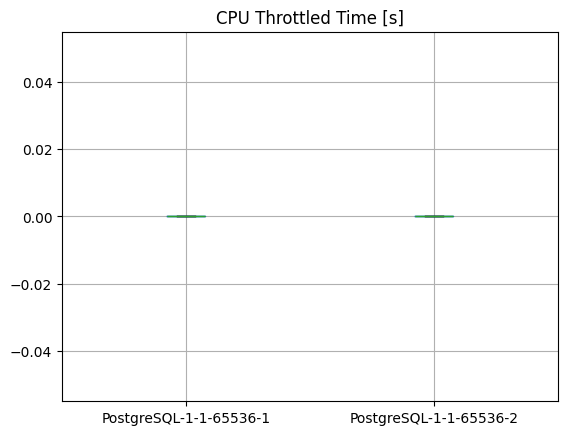

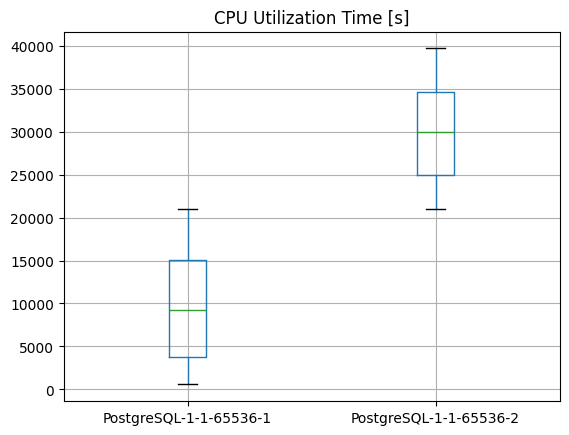

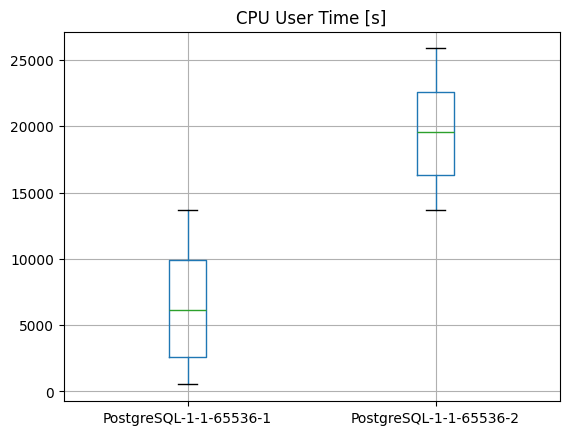

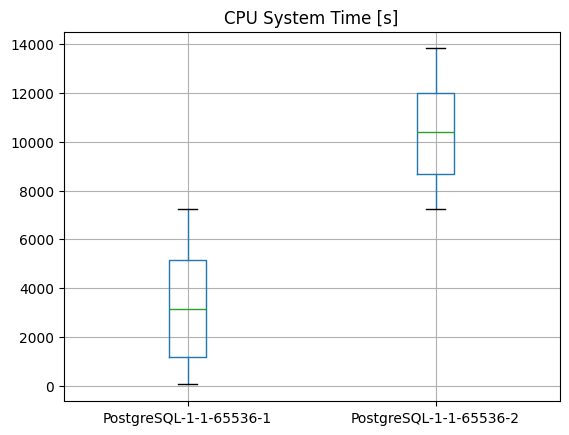

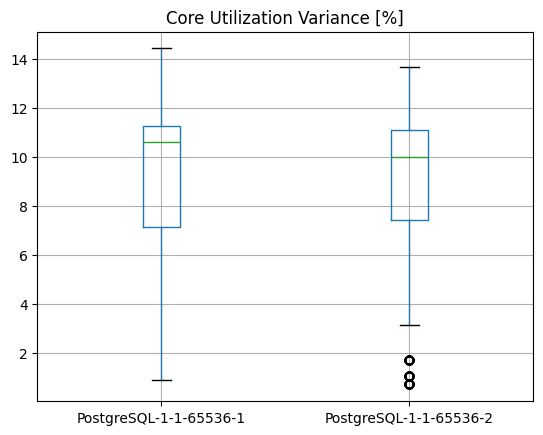

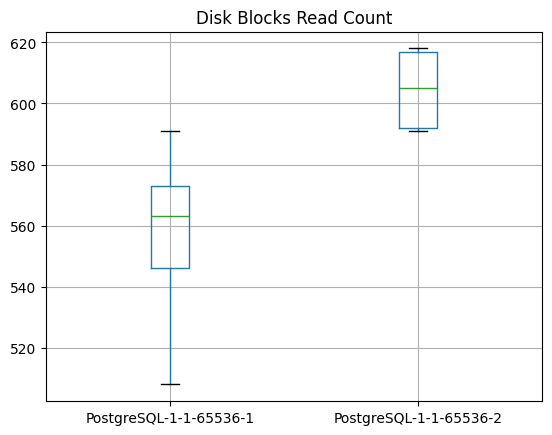

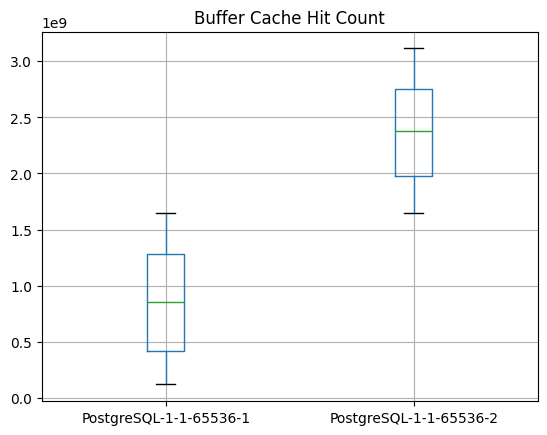

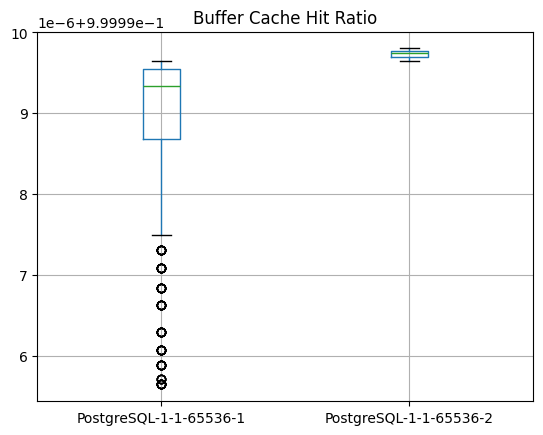

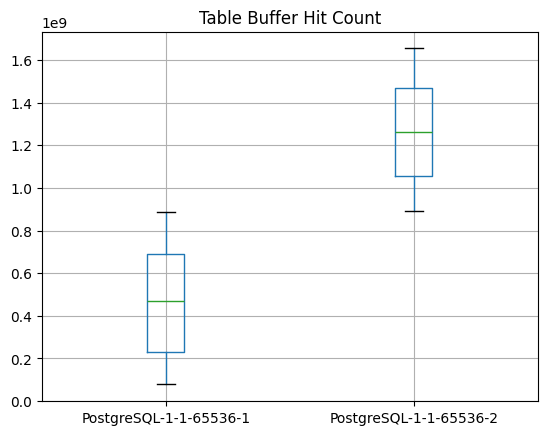

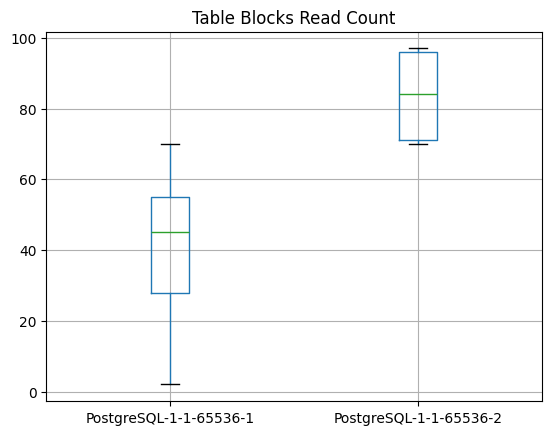

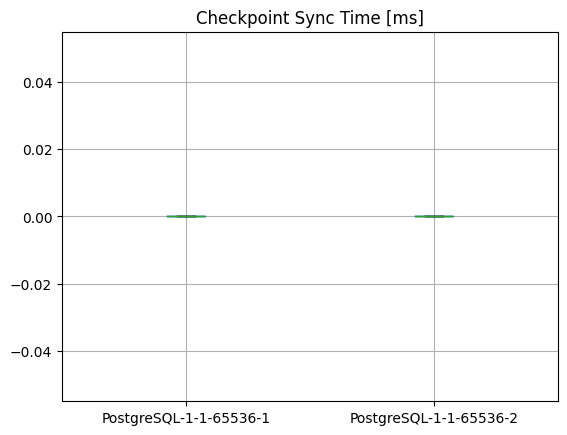

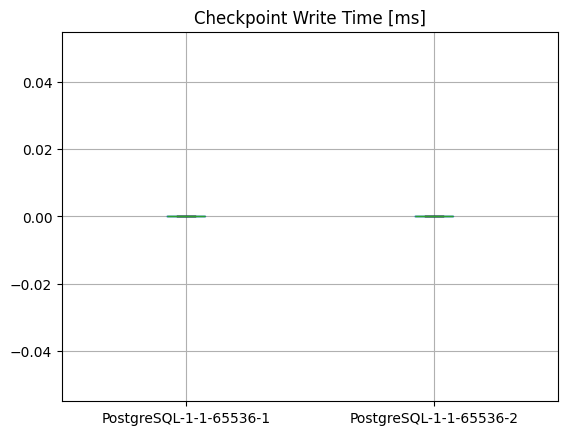

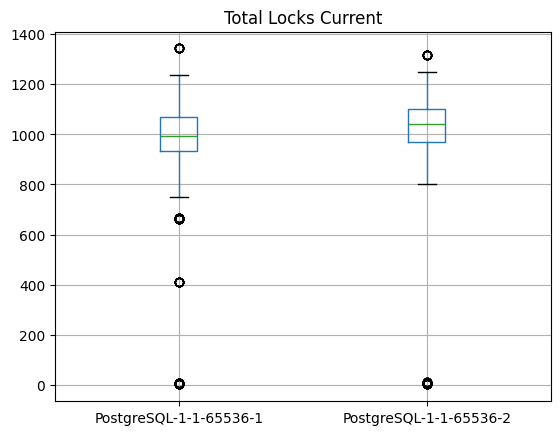

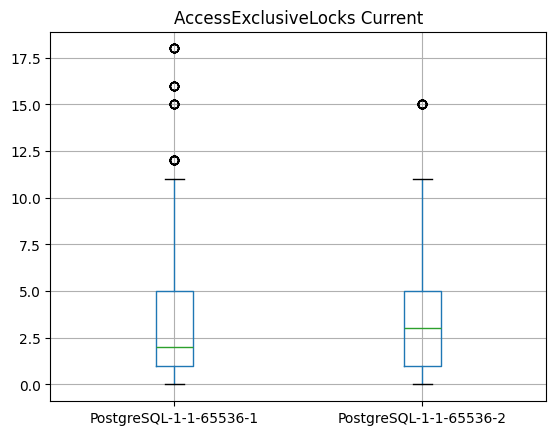

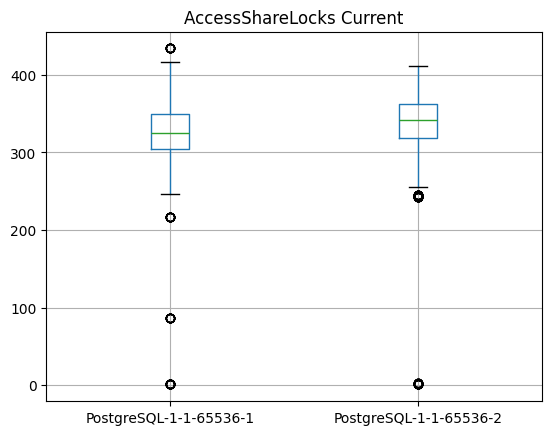

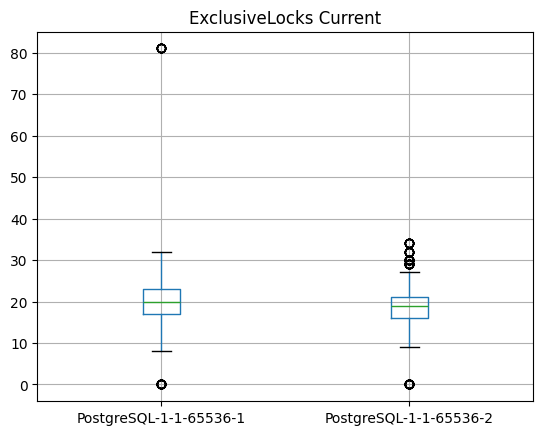

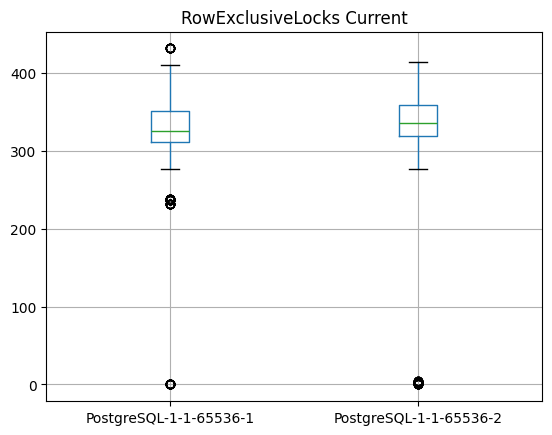

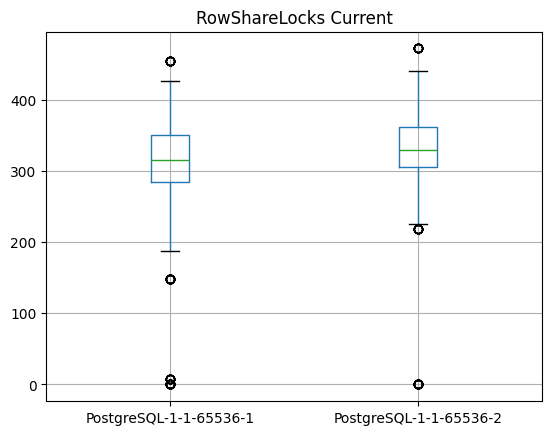

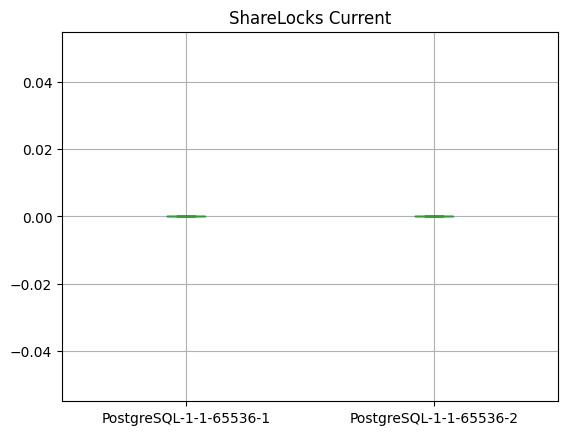

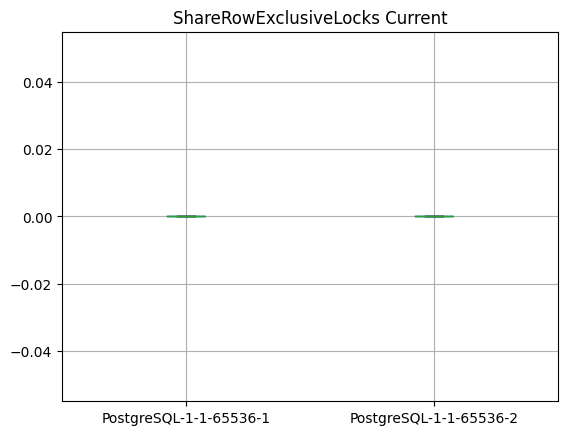

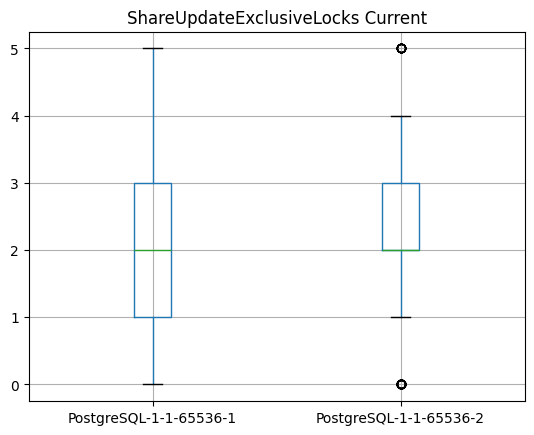

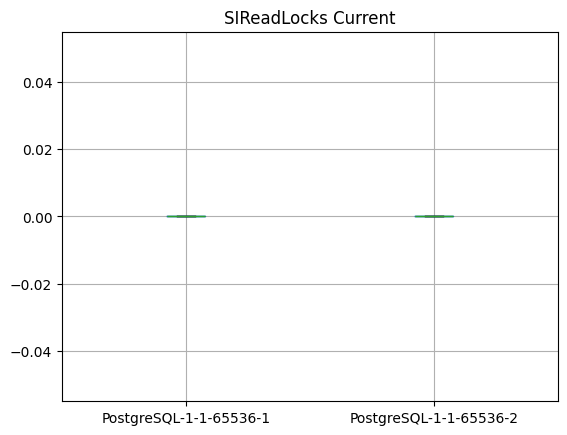

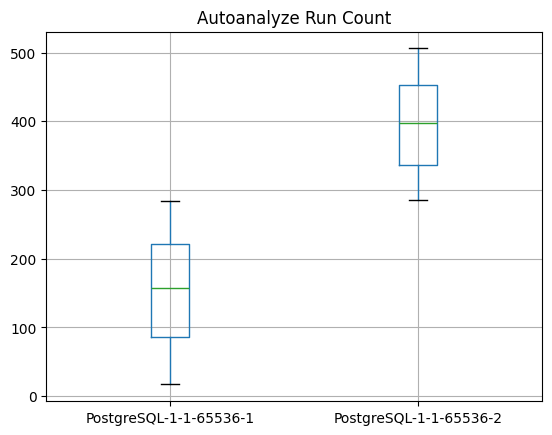

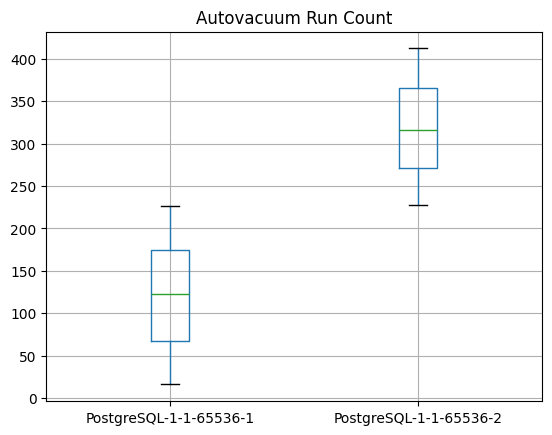

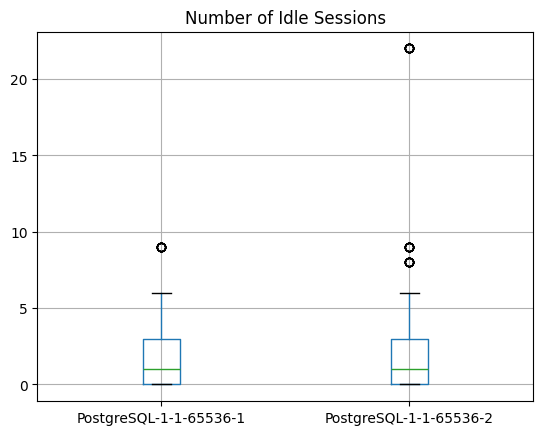

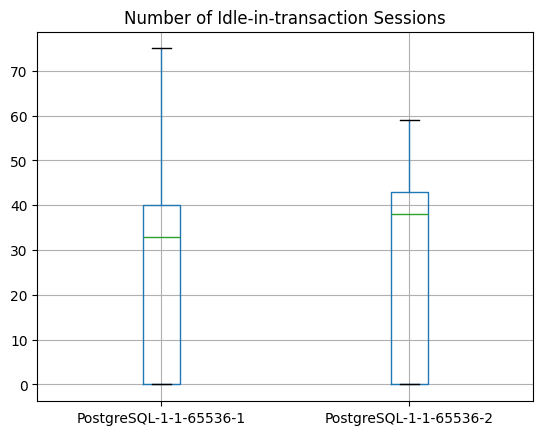

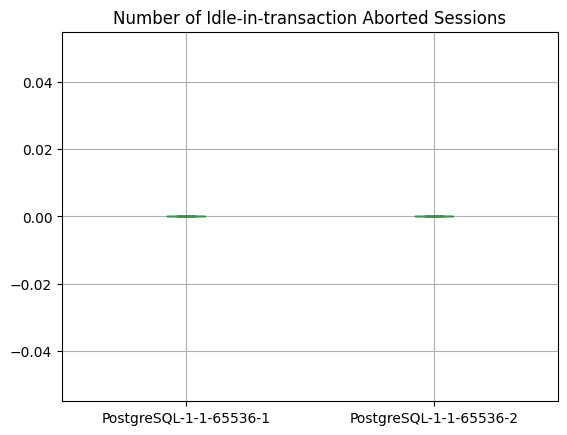

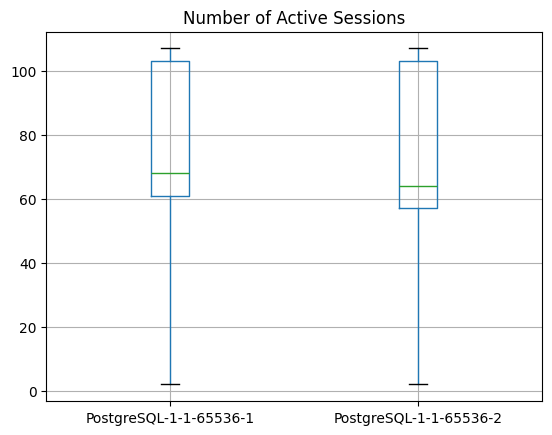

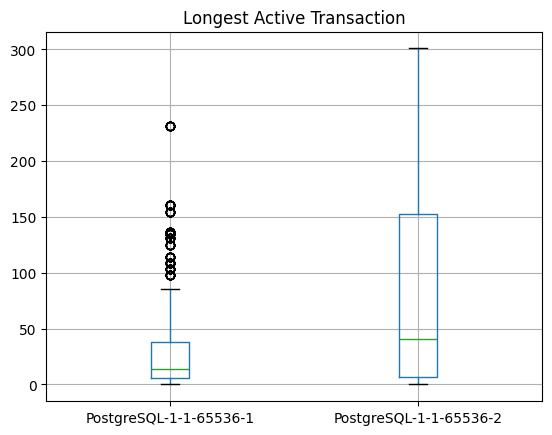

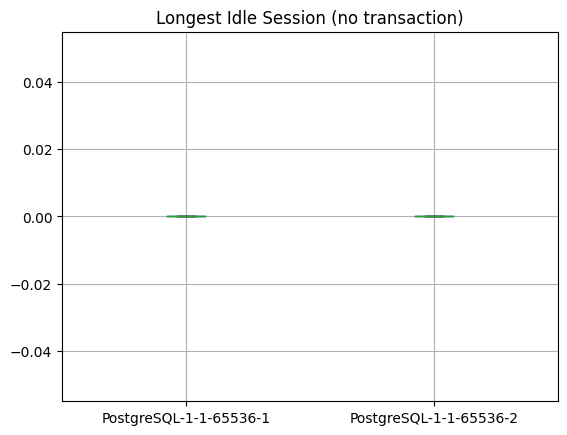

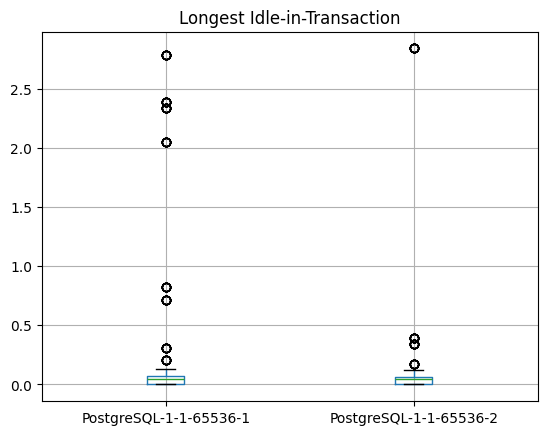

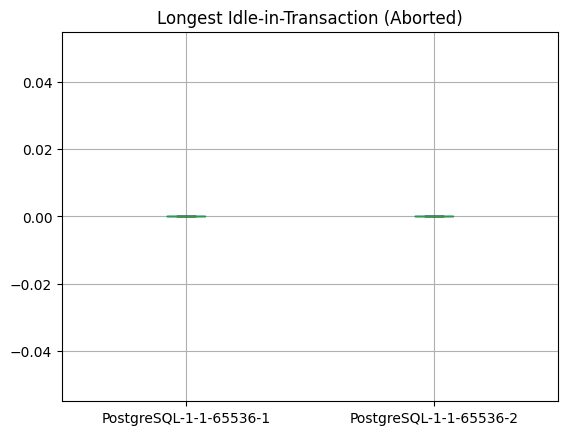

C:\Users\Patrick\.conda\envs\dbmsbenchmarker\Lib\site-packages\numpy\lib\_function_base_impl.py:4720: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Patrick\.conda\envs\dbmsbenchmarker\Lib\site-packages\matplotlib\cbook.py:1320: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Patrick\.conda\envs\dbmsbenchmarker\Lib\site-packages\matplotlib\cbook.py:1327: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Patrick\.conda\envs\dbmsbenchmarker\Lib\site-packages\matplotlib\cbook.py:1335: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Patrick\.conda\envs\dbmsbenchmarker\Lib\site-packages\matplotlib\cbook.py:1336: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


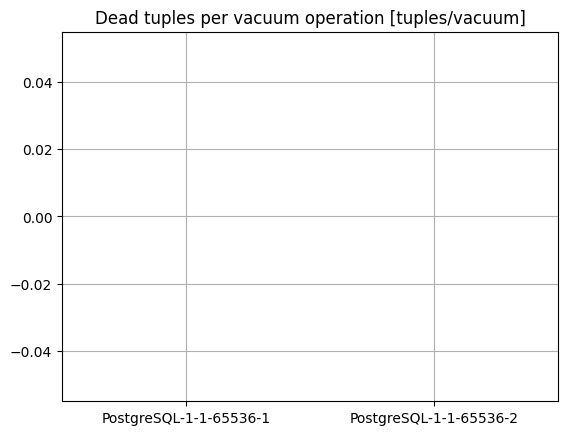

In [9]:
results = []
code = codes[2]
for idx, row in collect.df_metrics.iterrows():
    if row["active"] == False:
        continue
    #print(idx, row["title"])
    metric_name = idx
    method = 'diff' if row["metric"] == 'counter' else 'mean'
    col_name = row["title"]
    df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric_name)
    #print(df_monitoring)
    #plot_boxplots(df_monitoring, y=metric_name, title=col_name)
    ax = df_monitoring.boxplot()
    ax.set_title(col_name)
    plt.show()
    #plot_boxplots(df_performance_first, y='value', title=collect.df_metrics.loc[metric]['title'])

# Boxplot of A Single Metric for a Single Experiment

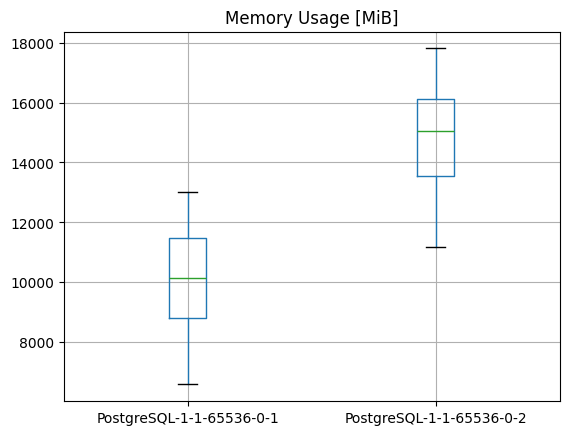

In [10]:
metric = 'pg_stat_activity_max_tx_duration_active'
#metric = 'pg_stat_database_blks_reads'
#metric = 'pg_stat_activity_count_idle_transaction'
metric = 'total_cpu_memory'
code = codes[0]
df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric)

#df_monitoring.plot(title=metric)
#df_monitoring.boxplot()
ax = df_monitoring.boxplot()
ax.set_title(collect.df_metrics.loc[metric]['title'])#metric)
plt.show()

# Lineplot of a Single Metric for a Single Experiment

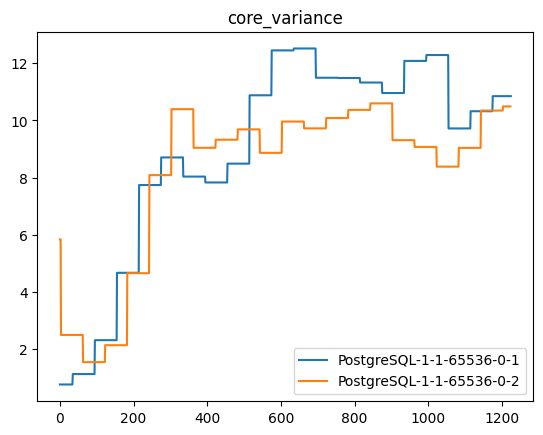

In [11]:
metric = 'pg_stat_database_blks_hit'
metric = 'pg_stat_activity_count_idle_transaction'
metric = 'total_cpu_memory'
metric = 'total_cpu_util'
metric = 'total_cpu_util_s'
metric = 'core_variance'

code = codes[0]
df_monitoring = collect.get_monitoring_timeseries_single(code, metric=metric)

#df_monitoring.plot(title=metric)
ax = df_monitoring.plot()
ax.set_title(metric)
plt.show()
#df_monitoring

# Boxplot of a Single Metric for all Experiments

In [12]:
metric = 'pg_stat_database_blks_hit'
metric = 'pg_stat_activity_count_idle_transaction'
metric = 'total_cpu_memory'
metric = 'total_cpu_util'
metric = 'total_cpu_util_s'
metric = 'core_variance'

df_performance = collect.get_monitoring_timeseries_all(metric)
#df_performance
df_performance_first = df_performance[df_performance['client']=="1"]
#df_performance_first
df_performance_second = df_performance[df_performance['client']=="2"]
#df_performance_second

## First Execution Run

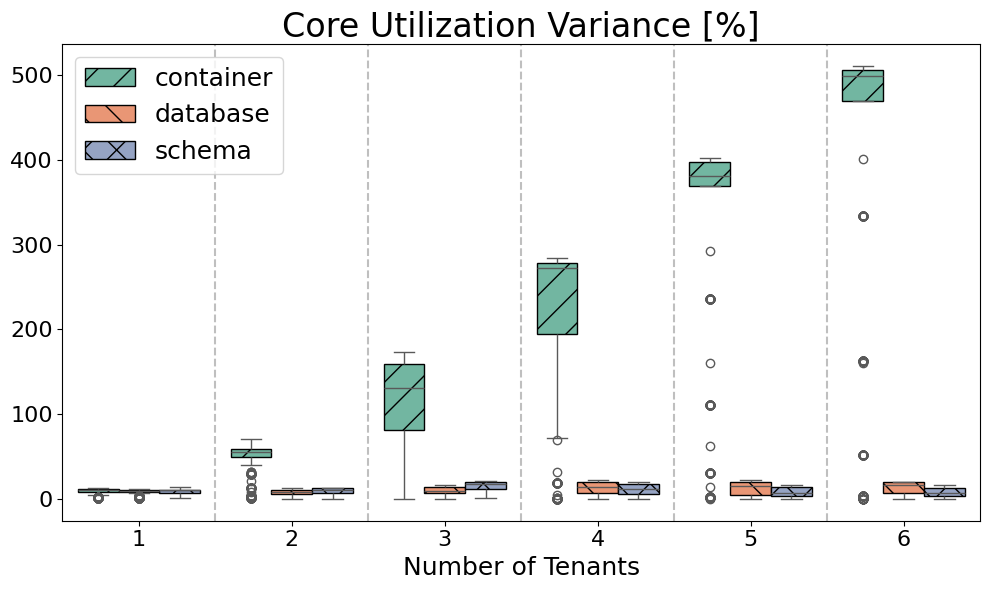

In [13]:
plot_boxplots(df_performance_first, y='value', title=collect.df_metrics.loc[metric]['title'])

## Second Execution Run

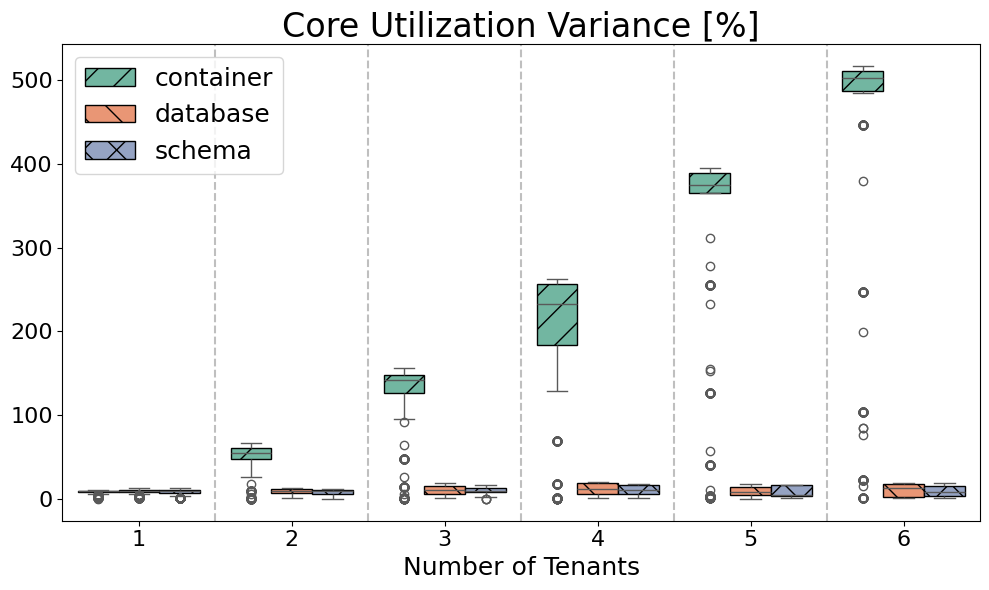

In [14]:
plot_boxplots(df_performance_second, y='value', title=collect.df_metrics.loc[metric]['title'])

# Lineplot of a Single Metric for All Experiments

## First Execution Run

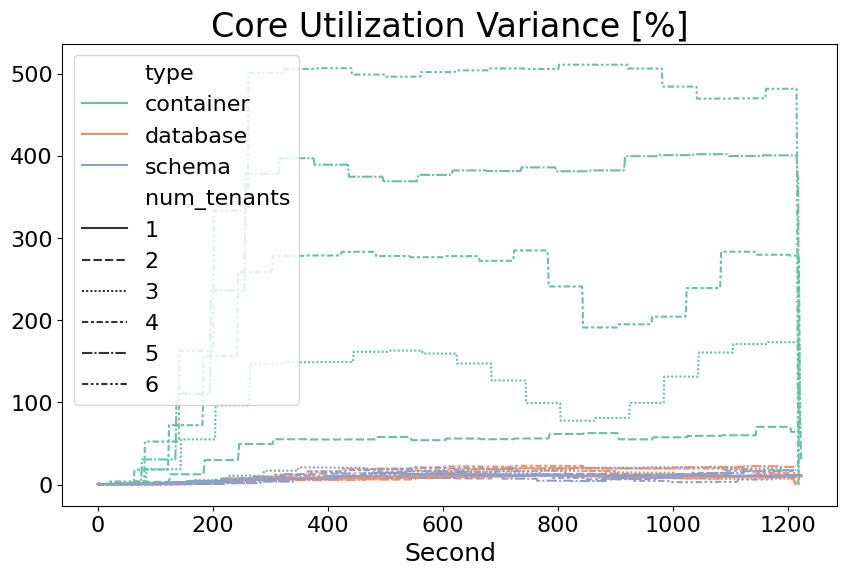

In [15]:
plot_lines(df_performance_first, y='value', title=collect.df_metrics.loc[metric]['title'])

# Aggregated Data for all Clients

In [16]:
df_performance = collect.get_monitoring_single_all("stream")
df_performance

Memory Usage [MiB]  Memory Usage Cached [MiB]  \
PostgreSQL-1-1-65536-0-1            10041.50                   20115.85   
PostgreSQL-1-1-65536-0-2            14915.16                   30144.54   
PostgreSQL-1-1-65536-1               9954.95                   19278.99   
PostgreSQL-1-1-65536-2              14696.05                   28908.07   
PostgreSQL-1-1-65536-1              10052.53                   19954.64   
PostgreSQL-1-1-65536-2              14919.49                   28658.81   
PostgreSQL-1-1-65536-0-1             9812.59                   19966.24   
PostgreSQL-1-1-65536-0-2            13983.86                   29119.27   
PostgreSQL-1-1-65536-1-1             9608.38                   18008.96   
PostgreSQL-1-1-65536-1-2            13677.84                   26985.91   
PostgreSQL-1-1-65536-1              12051.65                   24333.88   
PostgreSQL-1-1-65536-2              16640.96                   33064.05   
PostgreSQL-1-1-65536-1              12555.35                   26365.92   
PostgreSQL-1-1-65536-2              17447.92                   35120.35   
PostgreSQL-1-1-65536-0-1             9398.98                   17054.67   
PostgreSQL-1-1-65536-0-2            12929.08                   24382.29   
PostgreSQL-1-1-65536-1-1             9372.30                   16477.52   
PostgreSQL-1-1-65536-1-2            13046.30                   24821.63   
PostgreSQL-1-1-65536-2-1             9316.95                   17074.44   
PostgreSQL-1-1-65536-2-2            12828.13                   24707.51   
PostgreSQL-1-1-65536-1              15161.15                   30301.35   
PostgreSQL-1-1-65536-2              20305.79                   40473.43   
PostgreSQL-1-1-65536-1              16279.70                   35199.29   
PostgreSQL-1-1-65536-2              22863.36                   44741.94   
PostgreSQL-1-1-65536-0-1             9350.80                   15781.11   
PostgreSQL-1-1-65536-0-2            12365.90                   22290.79   
PostgreSQL-1-1-65536-1-1             9179.76                   16289.33   
PostgreSQL-1-1-65536-1-2            12121.68                   22137.72   
PostgreSQL-1-1-65536-2-1             9078.43                   15498.88   
PostgreSQL-1-1-65536-2-2            12083.51                   20949.42   
PostgreSQL-1-1-65536-3-1             9062.67                   15308.24   
PostgreSQL-1-1-65536-3-2            11872.65                   21014.20   
PostgreSQL-1-1-65536-1              18382.70                   36269.23   
PostgreSQL-1-1-65536-2              24026.29                   47179.10   
PostgreSQL-1-1-65536-1              18389.12                   36094.08   
PostgreSQL-1-1-65536-2              24168.41                   48551.65   
PostgreSQL-1-1-65536-0-1             8738.12                   14224.18   
PostgreSQL-1-1-65536-0-2            11220.03                   19253.76   
PostgreSQL-1-1-65536-1-1             8837.60                   14548.43   
PostgreSQL-1-1-65536-1-2            11359.62                   20373.54   
PostgreSQL-1-1-65536-2-1             8868.29                   15082.48   
PostgreSQL-1-1-65536-2-2            11421.75                   21299.07   
PostgreSQL-1-1-65536-3-1             8879.27                   14675.59   
PostgreSQL-1-1-65536-3-2            11429.21                   19561.66   
PostgreSQL-1-1-65536-4-1             8785.87                   14267.09   
PostgreSQL-1-1-65536-4-2            11191.03                   19538.72   
PostgreSQL-1-1-65536-1              20195.44                   38968.09   
PostgreSQL-1-1-65536-2              26473.28                   56616.00   
PostgreSQL-1-1-65536-1              19804.68                   37491.67   
PostgreSQL-1-1-65536-2              25038.70                   47283.32   
PostgreSQL-1-1-65536-0-1             8589.55                   13330.10   
PostgreSQL-1-1-65536-0-2            11197.55                   18906.88   
PostgreSQL-1-1-65536-1-1             8652.67       

# Monitoring Aggregated Values

In [17]:
df_performance = collect.get_monitoring_all("stream")

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance.T#[['Max CPU', 'client', 'type', 'num_tenants']]

0             1  \
client                                                       1             2   
Memory Usage [MiB]                                     10041.5      14915.16   
Memory Usage Cached [MiB]                             20115.85      30144.54   
CPU Utilization [%]                                      15.92         15.39   
CPU Throttle [%]                                           0.0           0.0   
CPU Throttled Time [s]                                     0.0           0.0   
CPU Utilization Time [s]                              20009.97      19021.29   
CPU User Time [s]                                     12787.23      12146.13   
CPU System Time [s]                                    7222.74       6875.16   
Core Utilization Variance [%]                             9.01          8.19   
Disk Blocks Read Count                                    72.0          34.0   
Buffer Cache Hit Count                            1549459926.0  1500589252.0   
Buffer Cache Hit Ratio                                     1.0           1.0   
Table Buffer Hit Count                             815254541.0   780661229.0   
Table Blocks Read Count                                   55.0          34.0   
Checkpoint Sync Time [ms]                                  0.0           0.0   
Checkpoint Write Time [ms]                                 0.0           0.0   
Total Locks Current                                    1003.38       1004.92   
AccessExclusiveLocks Current                              3.14          4.04   
AccessShareLocks Current                                328.29        327.22   
ExclusiveLocks Current                                   19.31         19.98   
RowExclusiveLocks Current                               330.02        334.92   
RowShareLocks Current                                   320.74        316.75   
ShareLocks Current                                         0.0           0.0   
ShareRowExclusiveLocks Current                             0.0           0.0   
ShareUpdateExclusiveLocks Current                         1.86           2.0   
SIReadLocks Current                                        0.0           0.0   
Autoanalyze Run Count                                    271.0         233.0   
Autovacuum Run Count                                     203.0         189.0   
Number of Idle Sessions                                   1.36          1.41   
Number of Idle-in-transaction Sessions                    24.3         21.63   
Number of Idle-in-transaction Aborted Sessions            0.01           0.0   
Number of Active Sessions                                104.0         104.0   
Longest Active Transaction                               17.39         35.85   
Longest Idle Session (no transaction)                      0.0           0.0   
Longest Idle-in-Transaction                                0.1          0.05   
Longest Idle-in-Transaction (Aborted)                      0.0           0.0   
Dead tuples per vacuum operation [tuples/vacuum]           inf           inf   
type                                                 container     container   
num_tenants                                                  1             1   
code                                                1755712809    1755712809   

                                                             0             1  \
client                                                       1             2   
Memory Usage [MiB]                                     9954.95      14696.05   
Memory Usage Cached [MiB]                             19278.99      28908.07   
CPU Utilization [%]                                       15.0         16.29   
CPU Throttle [%]                                           0.0           0.0   
CPU Throttled Time [s]                                     0.0           0.0   
CPU Utilization Time [s]                              18789.19      19963.08   
CPU User Time [s]                                     12478.

## First Execution Run

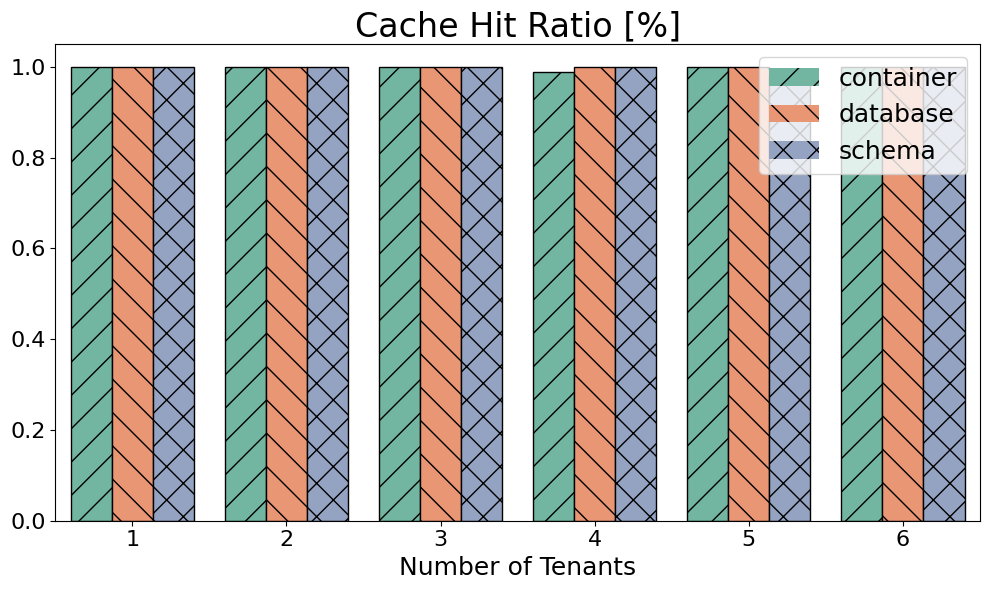

In [18]:
plot_bars(df_performance_first, y='Buffer Cache Hit Ratio', title='Cache Hit Ratio [%]', estimator='min')

## Second Execution Run

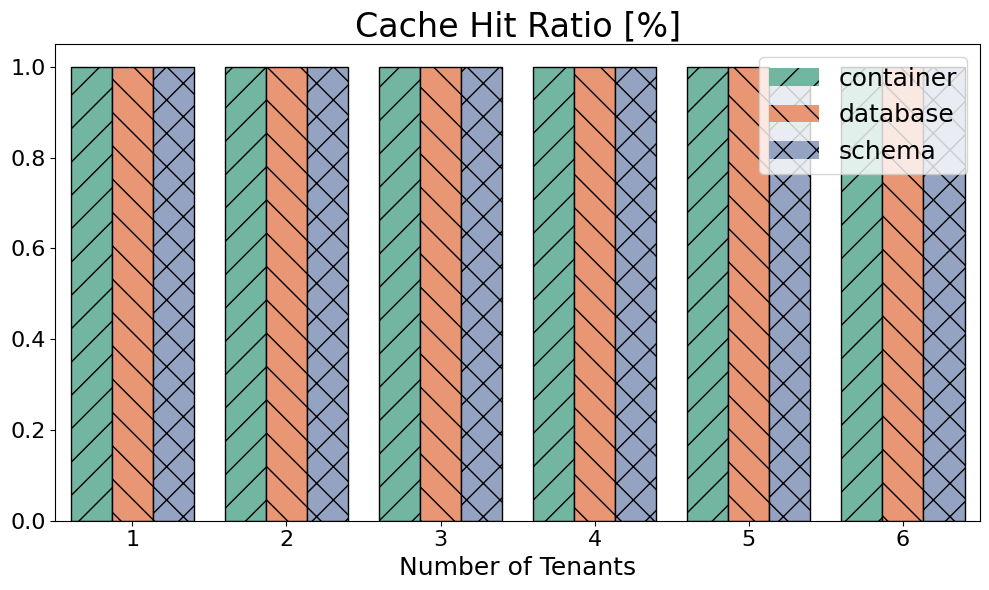

In [19]:
plot_bars(df_performance_second, y='Buffer Cache Hit Ratio', title='Cache Hit Ratio [%]', estimator='min')

# Performance Results per Tenant

In [20]:
df_performance = collect.get_performance_all_single()

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance

connection           configuration  \
connection_pod                                                                 
PostgreSQL-1-1-65536-0-1-1  PostgreSQL-1-1-65536-0-1  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-0-2-1  PostgreSQL-1-1-65536-0-2  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-0-1-1  PostgreSQL-1-1-65536-0-1  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-1-1-1  PostgreSQL-1-1-65536-1-1  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-0-2-1  PostgreSQL-1-1-65536-0-2  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-1-2-1  PostgreSQL-1-1-65536-1-2  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-2      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-2      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-2      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-2      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-0-1-1  PostgreSQL-1-1-65536-0-1  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-1-1-1  PostgreSQL-1-1-65536-1-1  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-2-1-1  PostgreSQL-1-1-65536-2-1  PostgreSQL-1-1-65536-2   
PostgreSQL-1-1-65536-0-2-1  PostgreSQL-1-1-65536-0-2  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-1-2-1  PostgreSQL-1-1-65536-1-2  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-2-2-1  PostgreSQL-1-1-65536-2-2  PostgreSQL-1-1-65536-2   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-2      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-3      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-2      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-3      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-2      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-3      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-2      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-3      PostgreSQL-1-1-65536-2    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-0-1-1  PostgreSQL-1-1-65536-0-1  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-1-1-1  PostgreSQL-1-1-65536-1-1  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-2-1-1  PostgreSQL-1-1-65536-2-1  PostgreSQL-1-1-65536-2   
PostgreSQL-1-1-65536-3-1-1  PostgreSQL-1-1-65536-3-1  PostgreSQL-1-1-65536-3   
PostgreSQL-1-1-65536-0-2-1  PostgreSQL-1-1-65536-0-2  PostgreSQL-1-1-65536-0   
PostgreSQL-1-1-65536-1-2-1  PostgreSQL-1-1-65536-1-2  PostgreSQL-1-1-65536-1   
PostgreSQL-1-1-65536-2-2-1  PostgreSQL-1-1-65536-2-2  PostgreSQL-1-1-65536-2   
PostgreSQL-1-1-65536-3-2-1  PostgreSQL-1-1-65536-3-2  PostgreSQL-1-1-65536-3   
PostgreSQL-1-1-65536-1-1      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-2      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-3      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-1-4      PostgreSQL-1-1-65536-1    PostgreSQL-1-1-65536   
PostgreSQL-1-1-65536-2-1      PostgreSQL-1

## First Execution Run

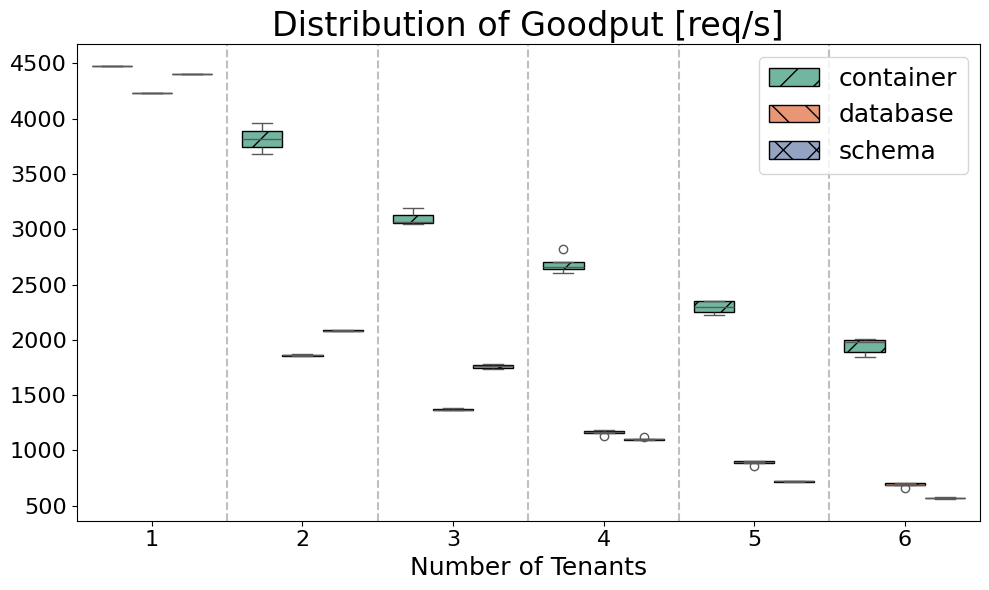

In [21]:
plot_boxplots(df_performance_first, y='Goodput (requests/second)', title='Distribution of Goodput [req/s]')

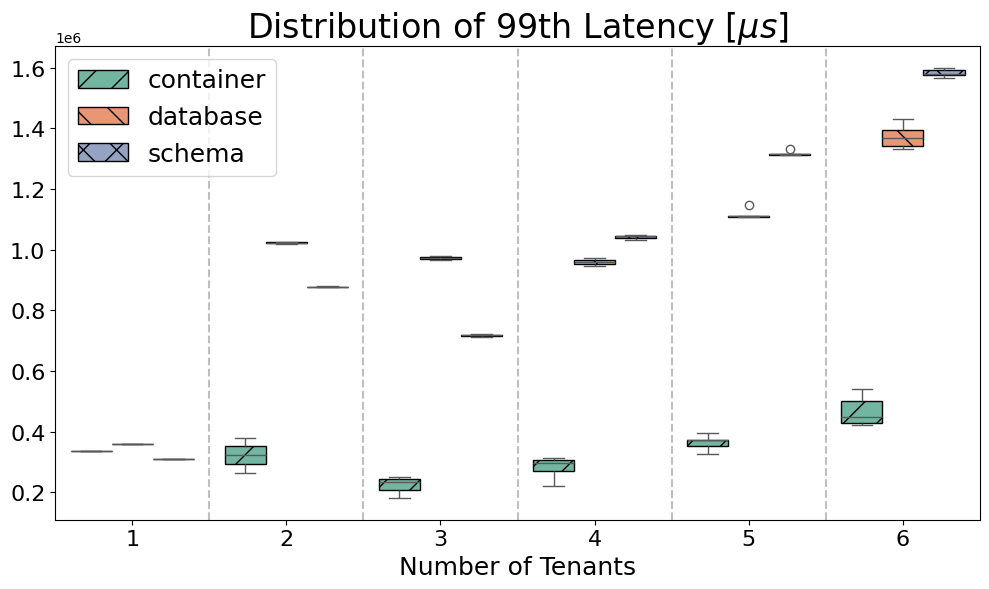

In [22]:
plot_boxplots(df_performance_first, y='Latency Distribution.99th Percentile Latency (microseconds)', title='Distribution of 99th Latency [$\mu s$]')

# Performance Results per Total

In [23]:
df_performance = collect.get_performance_all()

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance.dropna(inplace=True)

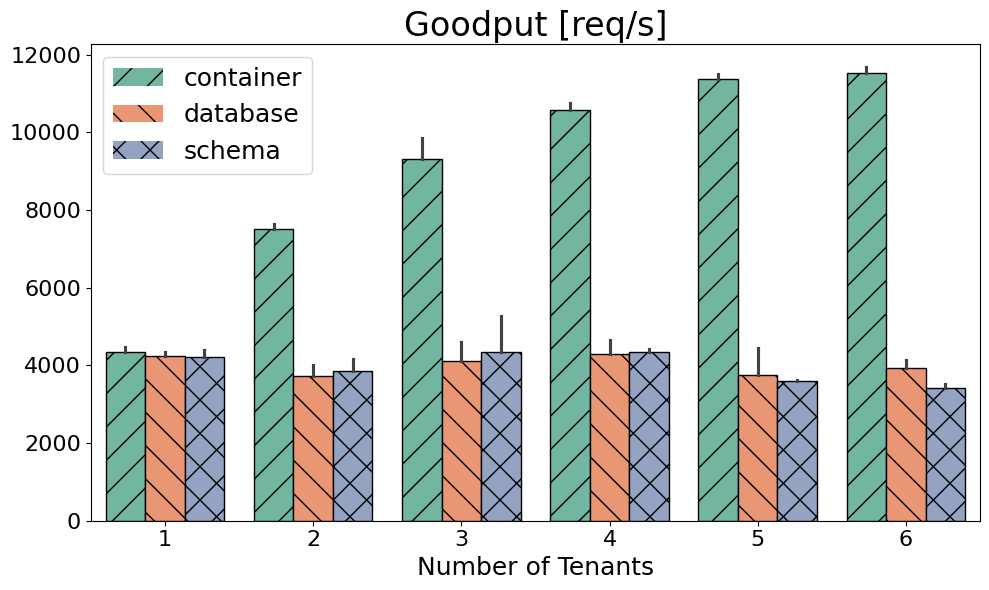

In [24]:
plot_bars(df_performance, y='Goodput (requests/second)', title='Goodput [req/s]', estimator='min')

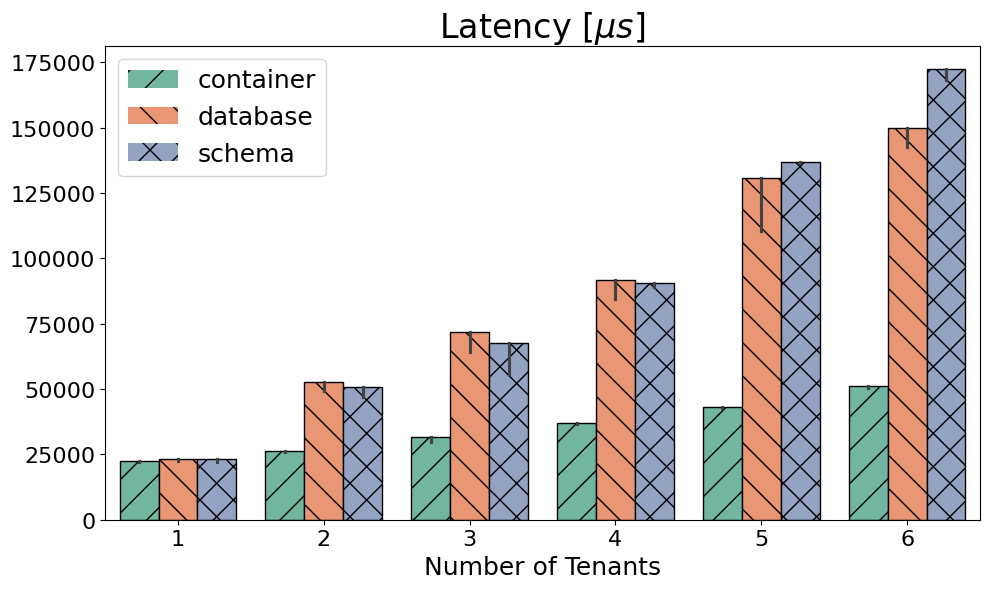

In [25]:
plot_bars(df_performance, y='Latency Distribution.Average Latency (microseconds)', title='Latency [$\mu s$]', estimator='max')

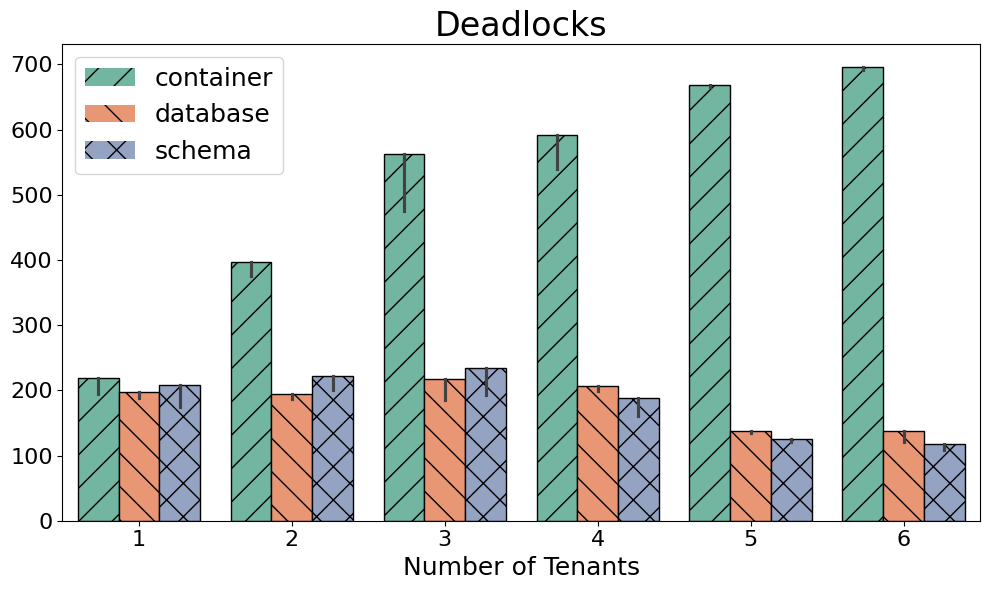

In [26]:
plot_bars(df_performance, y='num_errors', title='Deadlocks', estimator='max')

In [27]:
df_performance = collect.get_loading_time_max_all()

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance

time_load time_ingest time_check terminals pods  \
PostgreSQL-1-1-65536-0-1     318.0       128.0      186.0         1    1   
PostgreSQL-1-1-65536-0-2     318.0       128.0      186.0         1    1   
PostgreSQL-1-1-65536-1       315.0       124.0      187.0         1    1   
PostgreSQL-1-1-65536-2       315.0       124.0      187.0         1    1   
PostgreSQL-1-1-65536-1       323.0       126.0      193.0         1    1   
PostgreSQL-1-1-65536-2       323.0       126.0      193.0         1    1   
PostgreSQL-1-1-65536-0-1     458.0       182.0      272.0         1    1   
PostgreSQL-1-1-65536-0-2     458.0       182.0      272.0         1    1   
PostgreSQL-1-1-65536-1-1     453.0       184.0      265.0         1    1   
PostgreSQL-1-1-65536-1-2     453.0       184.0      265.0         1    1   
PostgreSQL-1-1-65536-1       629.0       273.0      350.0         1    2   
PostgreSQL-1-1-65536-2       629.0       273.0      350.0         1    2   
PostgreSQL-1-1-65536-1       649.0       291.0      352.0         1    2   
PostgreSQL-1-1-65536-2       649.0       291.0      352.0         1    2   
PostgreSQL-1-1-65536-0-1     418.0       149.0      266.0         1    1   
PostgreSQL-1-1-65536-0-2     418.0       149.0      266.0         1    1   
PostgreSQL-1-1-65536-1-1     397.0       136.0      258.0         1    1   
PostgreSQL-1-1-65536-1-2     397.0       136.0      258.0         1    1   
PostgreSQL-1-1-65536-2-1     404.0       150.0      251.0         1    1   
PostgreSQL-1-1-65536-2-2     404.0       150.0      251.0         1    1   
PostgreSQL-1-1-65536-1       868.0       380.0      479.0         1    3   
PostgreSQL-1-1-65536-2       868.0       380.0      479.0         1    3   
PostgreSQL-1-1-65536-1       787.0       336.0      441.0         1    3   
PostgreSQL-1-1-65536-2       787.0       336.0      441.0         1    3   
PostgreSQL-1-1-65536-0-1     446.0       150.0      293.0         1    1   
PostgreSQL-1-1-65536-0-2     446.0       150.0      293.0         1    1   
PostgreSQL-1-1-65536-1-1     436.0       146.0      287.0         1    1   
PostgreSQL-1-1-65536-1-2     436.0       146.0      287.0         1    1   
PostgreSQL-1-1-65536-2-1     437.0       153.0      281.0         1    1   
PostgreSQL-1-1-65536-2-2     437.0       153.0      281.0         1    1   
PostgreSQL-1-1-65536-3-1     424.0       148.0      273.0         1    1   
PostgreSQL-1-1-65536-3-2     424.0       148.0      273.0         1    1   
PostgreSQL-1-1-65536-1      1152.0       529.0      610.0         1    4   
PostgreSQL-1-1-65536-2      1152.0       529.0      610.0         1    4   
PostgreSQL-1-1-65536-1      1126.0       504.0      610.0         1    4   
PostgreSQL-1-1-65536-2      1126.0       504.0      610.0         1    4   
PostgreSQL-1-1-65536-0-1     501.0       158.0      340.0         1    1   
PostgreSQL-1-1-65536-0-2     501.0       158.0      340.0         1    1   
PostgreSQL-1-1-65536-1-1     500.0       163.0      333.0         1    1   
PostgreSQL-1-1-65536-1-2     500.0       163.0      333.0         1    1   
PostgreSQL-1-1-65536-2-1     489.0       160.0      326.0         1    1   
PostgreSQL-1-1-65536-2-2     489.0       160.0      326.0         1    1   
PostgreSQL-1-1-65536-3-1     482.0       161.0      318.0         1    1   
PostgreSQL-1-1-65536-3-2     482.0       161.0      318.0         1    1   
PostgreSQL-1-1-65536-4-1     472.0       156.0      312.0         1    1   
PostgreSQL-1-1-65536-4-2     472.0       156.0      312.0         1    1   
PostgreSQL-1-1-65536-1      1327.0       585.0      726.0         1    5   
PostgreSQL-1-1-65536-2      1327.0       585.0      726.0         1    5   
PostgreSQL-1-1-65536-1      1422.0       648.0      754.0         1    5   
PostgreSQL-1-1-65536-2      1422.0       648.0      754.0         1    5   
PostgreSQL-1-1-65536-0-1     517.0       163.0      350.0         1    1   
PostgreSQL-1-1-65536-0-2     517.0       163.0      350.0         1    1 

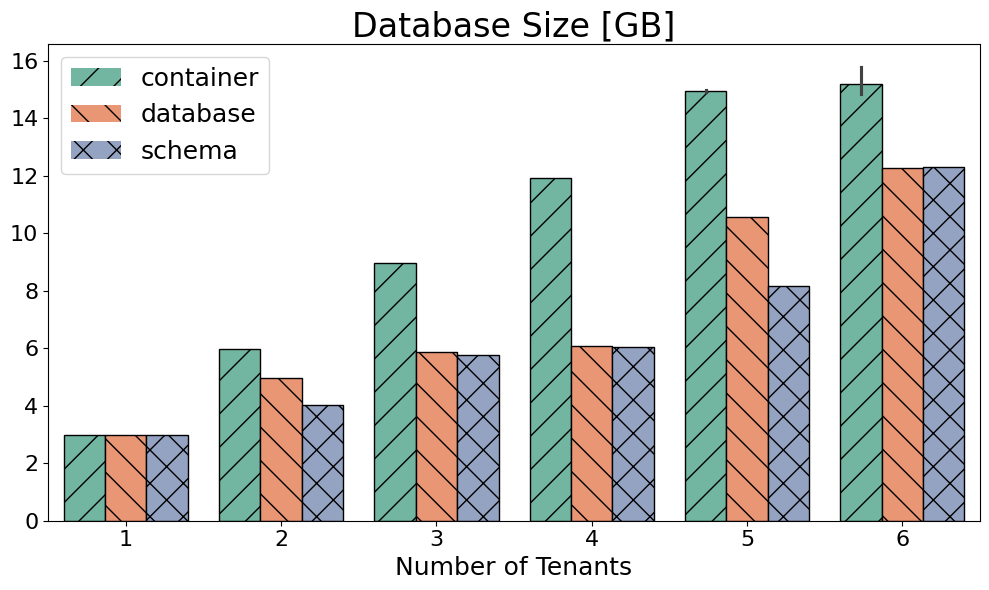

In [28]:
df_performance_first = df_performance[df_performance['client'] == '1']
# Divide datadisk by the count of rows with the same type and num_tenants
df = df_performance_first.copy()
# Create a mask for rows where type is not "container"
mask = df['type'] != 'container'

# Only apply the group count to the relevant rows
group_counts = df[mask].groupby(['type', 'num_tenants'])['datadisk'].transform('count')

# Initialize the column with NaN (or 0, if preferred)
df['datadisk_normalized'] = df['datadisk'] / 1024

# Apply the normalized value only where the mask is True
df.loc[mask, 'datadisk_normalized'] = df.loc[mask, 'datadisk'] / group_counts / 1024

plot_bars(df, y='datadisk_normalized', title='Database Size [GB]', estimator='sum')

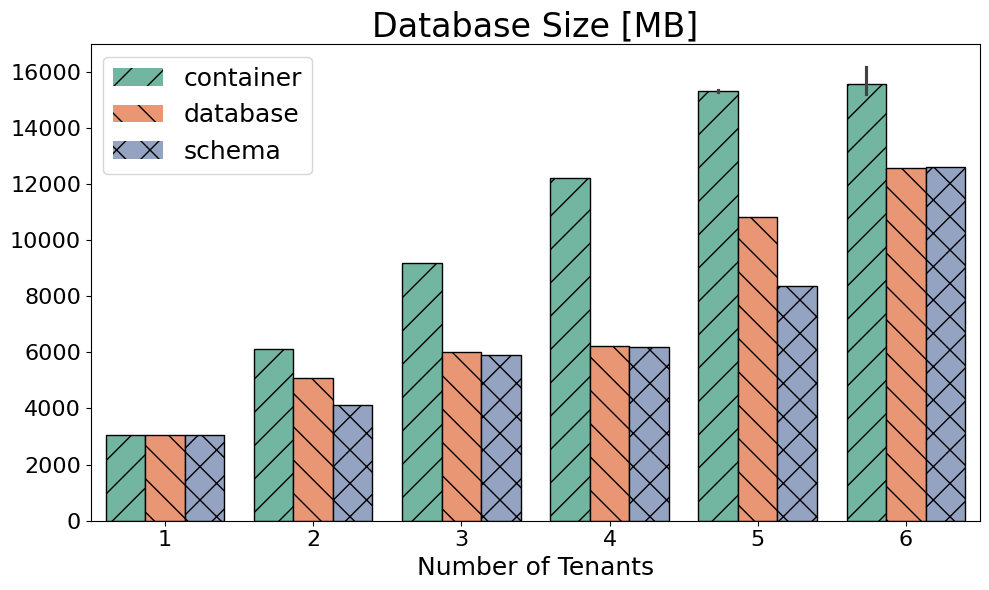

In [29]:
plot_bars(df_performance_first, y='datadisk', title='Database Size [MB]', estimator='sum')

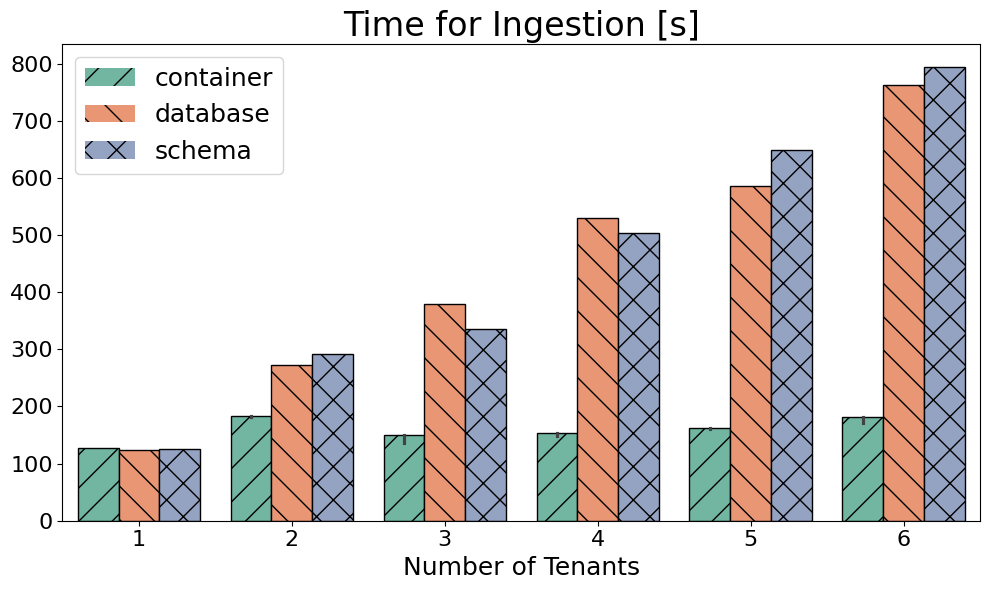

In [30]:
plot_bars(df_performance_first, y='time_ingest', title='Time for Ingestion [s]', estimator='max')

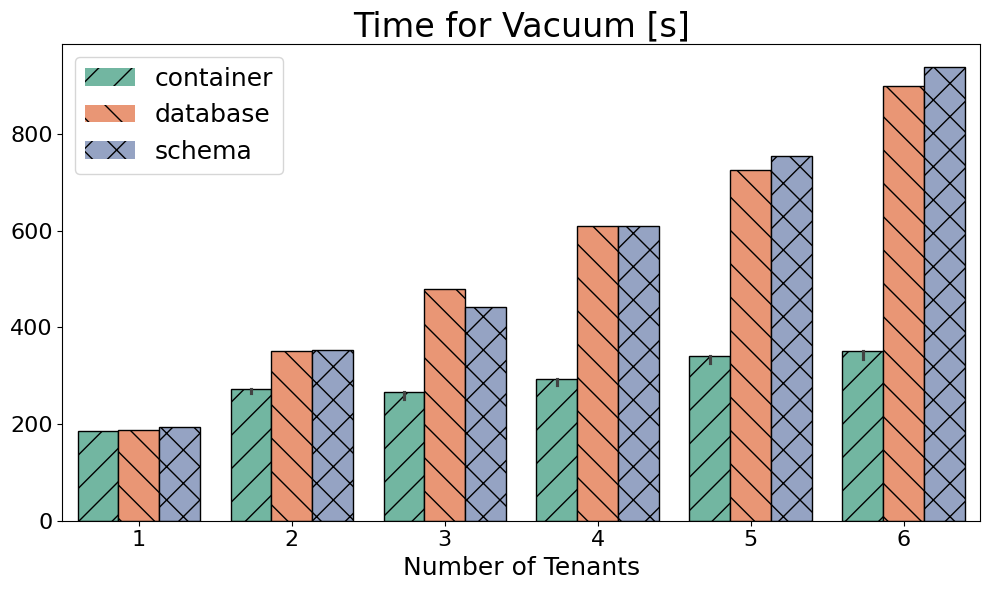

In [31]:
plot_bars(df_performance_first, y='time_check', title='Time for Vacuum [s]', estimator='max')

# Hardware Monitoring for Benchmarking Phase

In [32]:
df_performance = collect.get_monitoring_all(type="stream")

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance.T

0             1  \
client                                                       1             2   
Memory Usage [MiB]                                     10041.5      14915.16   
Memory Usage Cached [MiB]                             20115.85      30144.54   
CPU Utilization [%]                                      15.92         15.39   
CPU Throttle [%]                                           0.0           0.0   
CPU Throttled Time [s]                                     0.0           0.0   
CPU Utilization Time [s]                              20009.97      19021.29   
CPU User Time [s]                                     12787.23      12146.13   
CPU System Time [s]                                    7222.74       6875.16   
Core Utilization Variance [%]                             9.01          8.19   
Disk Blocks Read Count                                    72.0          34.0   
Buffer Cache Hit Count                            1549459926.0  1500589252.0   
Buffer Cache Hit Ratio                                     1.0           1.0   
Table Buffer Hit Count                             815254541.0   780661229.0   
Table Blocks Read Count                                   55.0          34.0   
Checkpoint Sync Time [ms]                                  0.0           0.0   
Checkpoint Write Time [ms]                                 0.0           0.0   
Total Locks Current                                    1003.38       1004.92   
AccessExclusiveLocks Current                              3.14          4.04   
AccessShareLocks Current                                328.29        327.22   
ExclusiveLocks Current                                   19.31         19.98   
RowExclusiveLocks Current                               330.02        334.92   
RowShareLocks Current                                   320.74        316.75   
ShareLocks Current                                         0.0           0.0   
ShareRowExclusiveLocks Current                             0.0           0.0   
ShareUpdateExclusiveLocks Current                         1.86           2.0   
SIReadLocks Current                                        0.0           0.0   
Autoanalyze Run Count                                    271.0         233.0   
Autovacuum Run Count                                     203.0         189.0   
Number of Idle Sessions                                   1.36          1.41   
Number of Idle-in-transaction Sessions                    24.3         21.63   
Number of Idle-in-transaction Aborted Sessions            0.01           0.0   
Number of Active Sessions                                104.0         104.0   
Longest Active Transaction                               17.39         35.85   
Longest Idle Session (no transaction)                      0.0           0.0   
Longest Idle-in-Transaction                                0.1          0.05   
Longest Idle-in-Transaction (Aborted)                      0.0           0.0   
Dead tuples per vacuum operation [tuples/vacuum]           inf           inf   
type                                                 container     container   
num_tenants                                                  1             1   
code                                                1755712809    1755712809   

                                                             0             1  \
client                                                       1             2   
Memory Usage [MiB]                                     9954.95      14696.05   
Memory Usage Cached [MiB]                             19278.99      28908.07   
CPU Utilization [%]                                       15.0         16.29   
CPU Throttle [%]                                           0.0           0.0   
CPU Throttled Time [s]                                     0.0           0.0   
CPU Utilization Time [s]                              18789.19      19963.08   
CPU User Time [s]                                     12478.

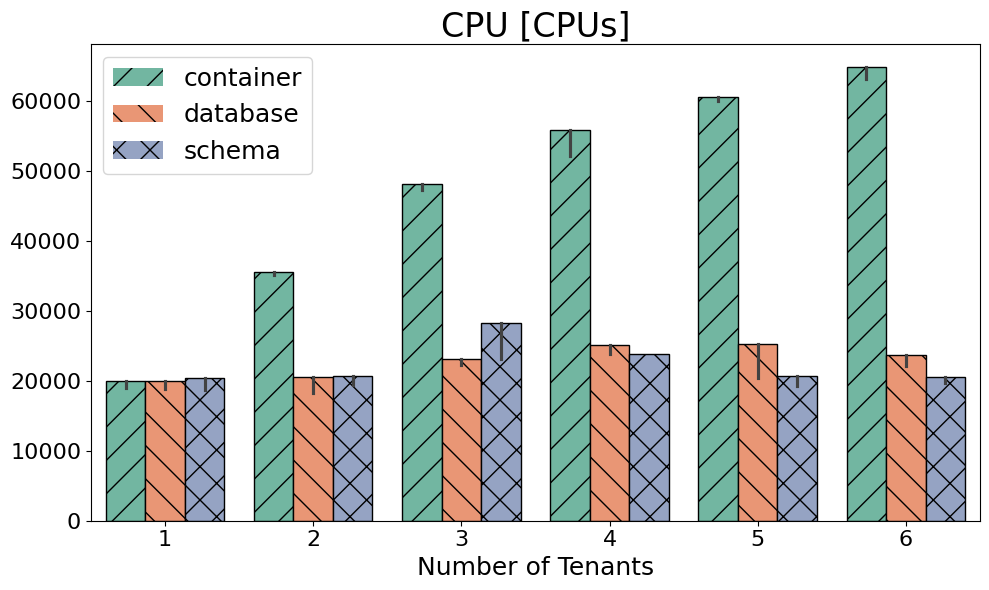

In [33]:
plot_bars(df_performance, y='CPU Utilization Time [s]', title='CPU [CPUs]', estimator='max')

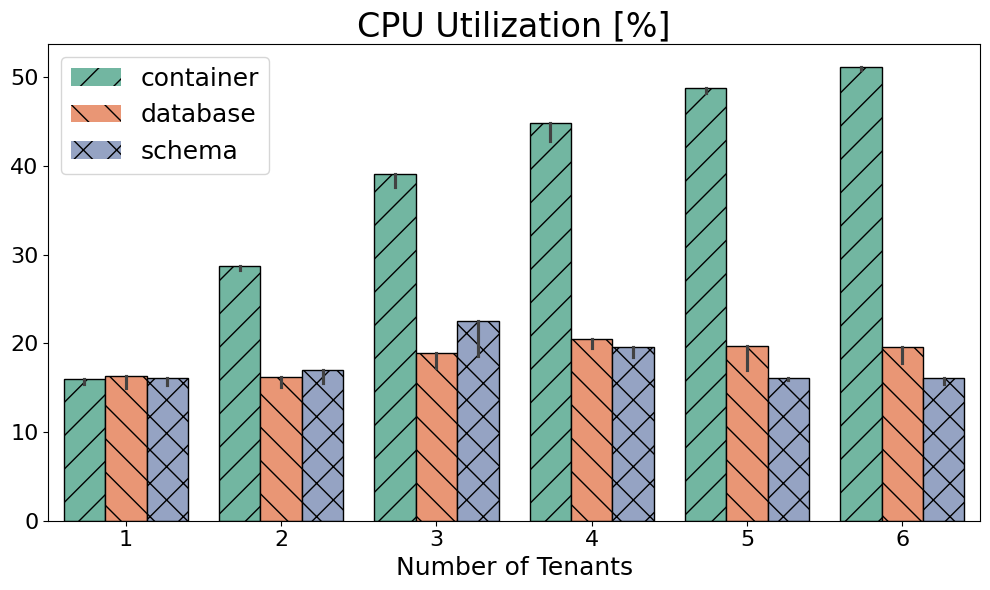

In [34]:
plot_bars(df_performance, y='CPU Utilization [%]', title='CPU Utilization [%]', estimator='max')

## Custom Aggregation

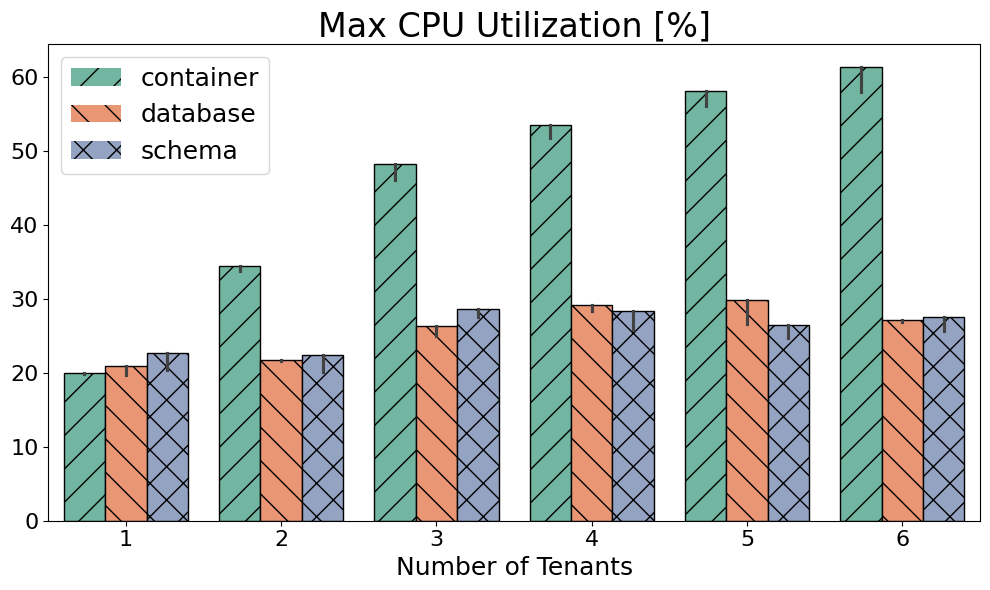

In [35]:
metric = 'total_cpu_util'

df_performance_series = collect.get_monitoring_timeseries_all(metric)

df_agg = (
    df_performance_series.groupby(["client", "type", "num_tenants"])["value"]
      .max()
      .reset_index()
)
plot_bars(df_agg, y='value', title='Max CPU Utilization [%]', estimator='max')
#df_agg

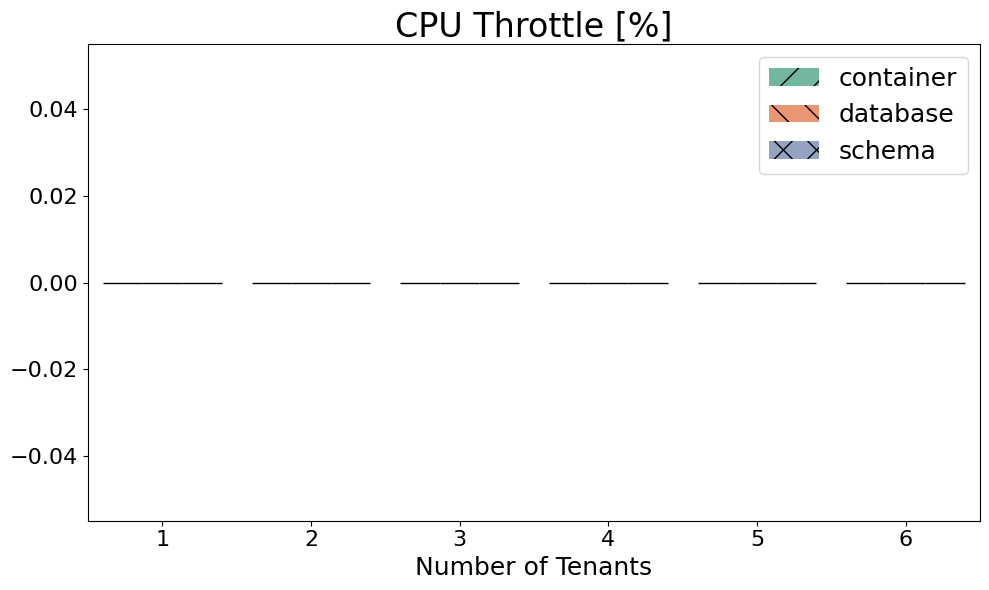

In [36]:
plot_bars(df_performance, y='CPU Throttle [%]', title='CPU Throttle [%]', estimator='max')

## Custom Aggregation and Scale

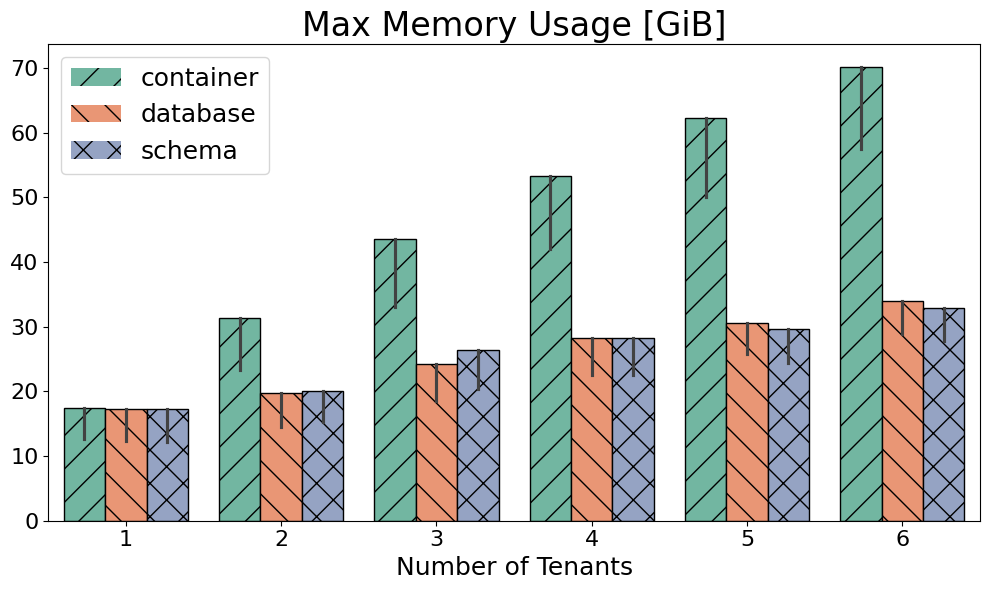

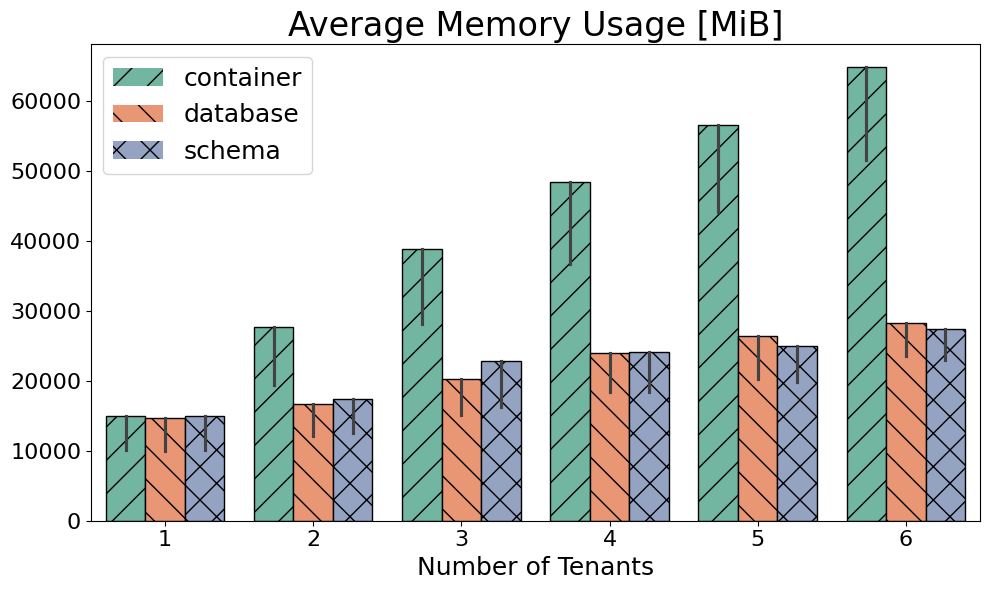

In [37]:
metric = 'total_cpu_memory'

df_performance_series = collect.get_monitoring_timeseries_all(metric)

df_agg = (
    df_performance_series.groupby(["client", "type", "num_tenants"])["value"]
      .max()
      .reset_index()
)
df_agg['value'] = df_agg['value'] / 1024.
plot_bars(df_agg, y='value', title='Max Memory Usage [GiB]', estimator='max')

plot_bars(df_performance, y='Memory Usage [MiB]', title='Average Memory Usage [MiB]', estimator='max')

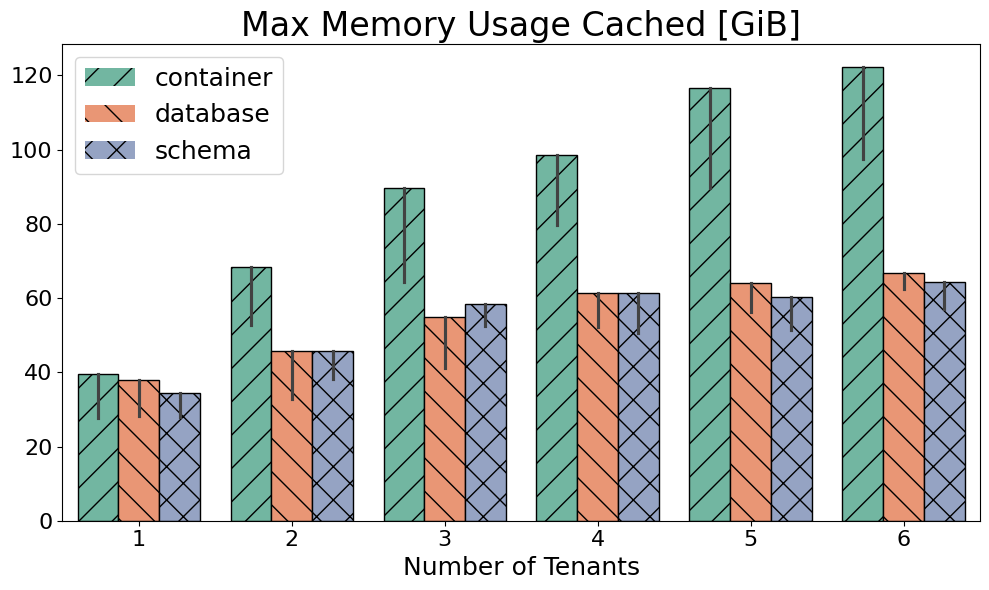

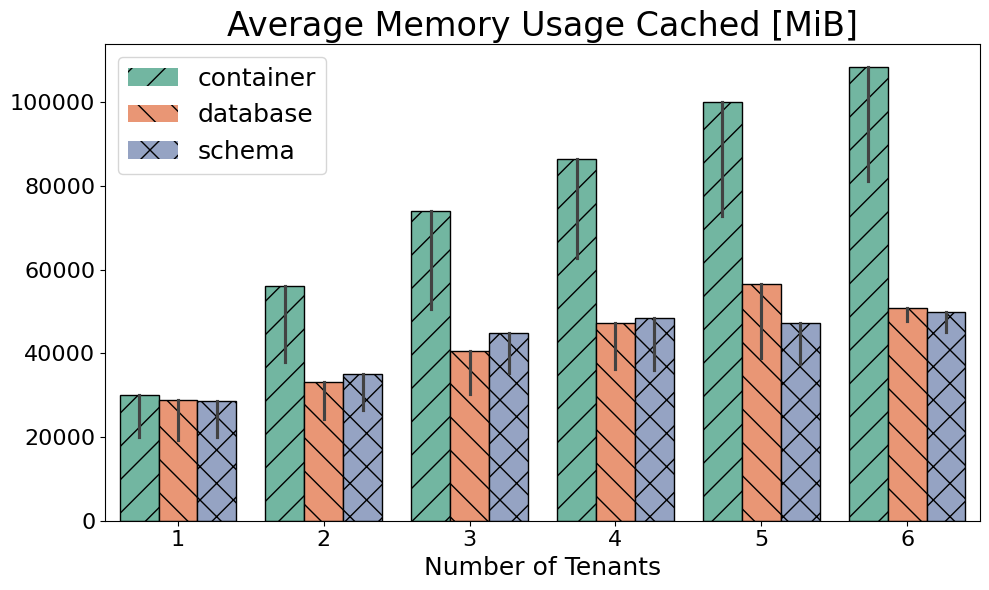

In [38]:
metric = 'total_cpu_memory_cached'

df_performance_series = collect.get_monitoring_timeseries_all(metric)

df_agg = (
    df_performance_series.groupby(["client", "type", "num_tenants"])["value"]
      .max()
      .reset_index()
)
df_agg['value'] = df_agg['value'] / 1024.
plot_bars(df_agg, y='value', title='Max Memory Usage Cached [GiB]', estimator='max')

plot_bars(df_performance, y='Memory Usage Cached [MiB]', title='Average Memory Usage Cached [MiB]', estimator='max')

# Hardware Monitoring for Loading Phase

In [39]:
df_performance = collect.get_monitoring_all("loading")

df_performance_first = df_performance[df_performance['client']=='1']
df_performance_second = df_performance[df_performance['client']=='2']

df_performance

client  Memory Usage [MiB]  Memory Usage Cached [MiB]  CPU Utilization [%]  \
0      1             6177.65                    7599.95                 2.16   
1      2             6177.65                    7599.95                 2.16   
0      1             6183.59                    7621.09                 2.20   
1      2             6183.59                    7621.09                 2.20   
0      1             6162.82                    7625.42                 2.41   
1      2             6162.82                    7625.42                 2.41   
0      1            12370.29                   15462.71                 3.27   
1      2            12370.29                   15462.71                 3.27   
0      1             6935.62                   10003.01                 2.78   
1      2             6935.62                   10003.01                 2.78   
0      1             6934.59                    9951.84                 2.39   
1      2             6934.59                    9951.84                 2.39   
0      1            18537.82                   23472.14                 4.92   
1      2            18537.82                   23472.14                 4.92   
0      1             7682.87                   11710.29                 3.18   
1      2             7682.87                   11710.29                 3.18   
0      1             7670.77                   11844.28                 3.13   
1      2             7670.77                   11844.28                 3.13   
0      1            25011.35                   32154.37                 6.41   
1      2            25011.35                   32154.37                 6.41   
0      1             8492.11                   13839.69                 3.49   
1      2             8492.11                   13839.69                 3.49   
0      1             8604.21                   14384.30                 3.16   
1      2             8604.21                   14384.30                 3.16   
0      1            31278.15                   40399.26                 7.14   
1      2            31278.15                   40399.26                 7.14   
0      1             9191.32                   15987.12                 3.82   
1      2             9191.32                   15987.12                 3.82   
0      1             9371.10                   16026.43                 3.44   
1      2             9371.10                   16026.43                 3.44   
0      1            37278.64                   47126.74                 8.33   
1      2            37278.64                   47126.74                 8.33   
0      1            10062.36                   18366.08                 3.90   
1      2            10062.36                   18366.08                 3.90   
0      1            10142.48                   18181.27                 3.46   
1      2            10142.48                   18181.27                 3.46   

   CPU Throttle [%]  CPU Throttled Time [s]  CPU Utilization Time [s]  \
0               0.0                     0.0                    473.61   
1               0.0                     0.0                    473.61   
0               0.0                     0.0                    450.59   
1               0.0                     0.0                    450.59   
0               0.0                     0.0                    532.60   
1               0.0                     0.0                    532.60   
0               0.0                     0.0                    911.45   
1               0.0                     0.0                    911.45   
0               0.0                     0.0                    962.27   
1               0.0                     0.0                    962.27   
0               0.0                     0.0                    982.51   
1               0.0                     0.0                    982.51   
0               0.0                     0.0                   1342.67   
1               0.0

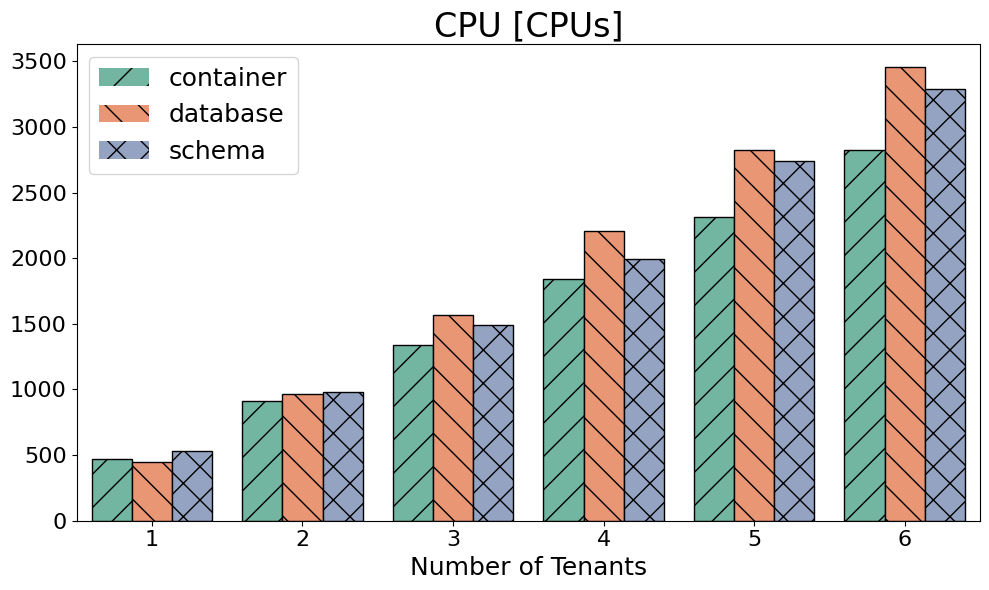

In [40]:
plot_bars(df_performance, y='CPU Utilization Time [s]', title='CPU [CPUs]', estimator='max')

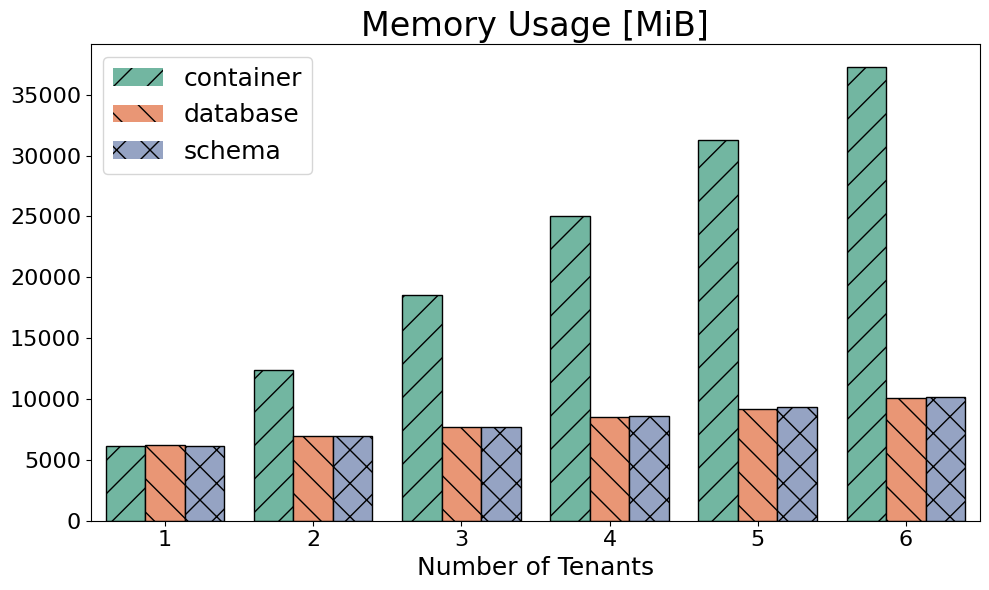

In [41]:
plot_bars(df_performance, y='Memory Usage [MiB]', title='Memory Usage [MiB]', estimator='max')

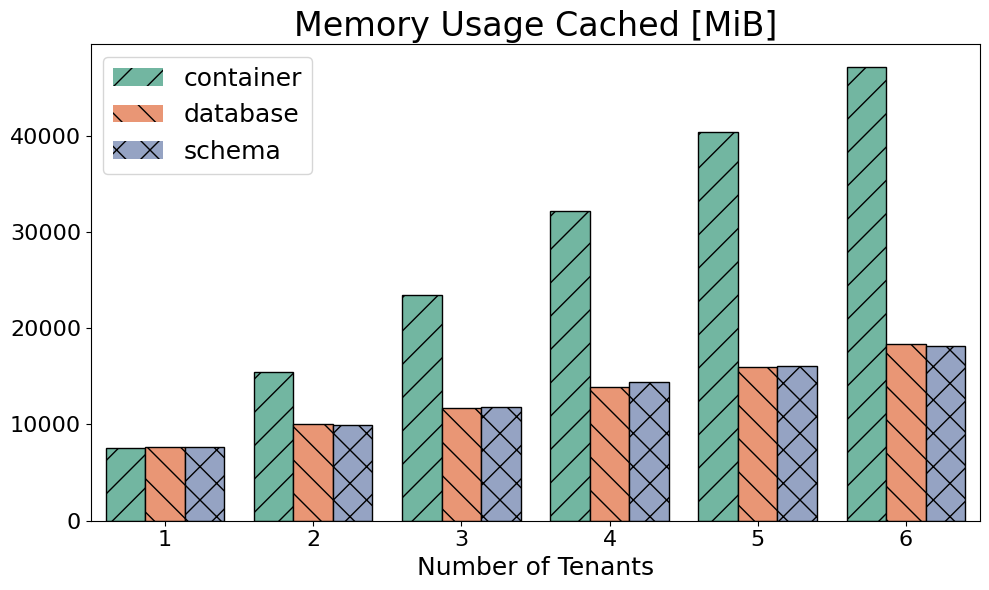

In [42]:
plot_bars(df_performance, y='Memory Usage Cached [MiB]', title='Memory Usage Cached [MiB]', estimator='max')

# Efficiency

In [43]:
client = '1'

df_performance_monitoring = collect.get_monitoring_all(type="stream")
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = collect.get_performance_all()
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants', 'code', 'client'], how='inner')
#merged_df['I_Lat'] = 1./merged_df['E_Lat']
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU Utilization Time [s]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU Utilization Time [s]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Memory Usage [MiB]']
merged_df

client  Goodput (requests/second)  num_errors  \
0       1                4477.087305         219   
1       1                4237.045680         198   
2       1                4407.490708         175   
3       1                7638.532292         397   
4       1                3725.088204         195   
5       1                4168.893177         222   
6       1                9306.547874         475   
7       1                4113.870683         185   
8       1                5279.808113         234   
9       1               10748.235389         592   
10      1                4654.367410         199   
11      1                4420.116486         189   
12      1               11489.032255         669   
13      1                4451.885634         138   
14      1                3597.893262         126   
15      1               11680.126421         696   
16      1                4143.692345         138   
17      1                3420.536559         109   

    Latency Distribution.Average Latency (microseconds)  \
0                                          21930.000000   
1                                          23153.000000   
2                                          22272.000000   
3                                          25744.500000   
4                                          52730.500000   
5                                          47119.500000   
6                                          31675.666667   
7                                          71691.000000   
8                                          55856.666667   
9                                          36540.750000   
10                                         84518.250000   
11                                         88995.750000   
12                                         42753.000000   
13                                        110530.200000   
14                                        136782.200000   
15                                         50488.166667   
16                                        142618.166667   
17                                        172637.833333   

    Latency Distribution.99th Percentile Latency (microseconds)       type  \
0                                                        335879  container   
1                                                        358411   database   
2                                                        308980     schema   
3                                                        380191  container   
4                                                       1025453   database   
5                                                        879209     schema   
6                                                        251642  container   
7                                                        978490   database   
8                                                        721310     schema   
9                                                        312965  container   
10                                                       972964   database   
11                                                      1049702     schema   
12                                                       394201  container   
13                                                      1147425   database   
14                                                      1331069     schema   
15                                                       540363  container   
16                                                      1432337   database   
17                                                      1600896     schema   

    num_tenants        code  Memory Usage [MiB]  Memory Usage Cached [MiB]  \
0             1  1755712809            10041.50                   20115.85   
1             1  1755709687             9954.95                   19278.99   
2             1  1755706475            10052.53                   19954.64   
3             2  1755768953            19420.97                   37975.20   
4             2  17

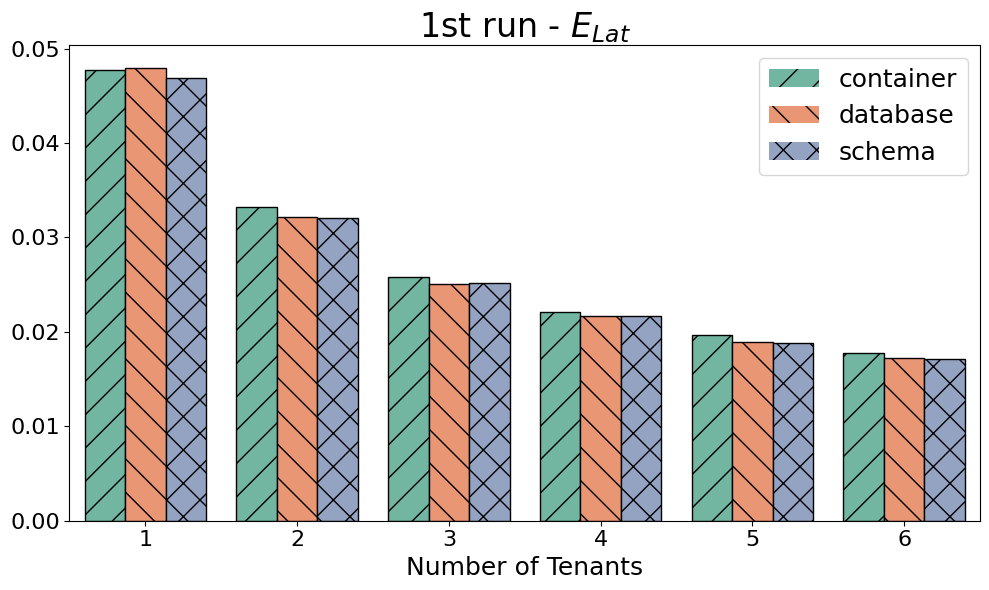

In [44]:
plot_bars(merged_df, y='E_Lat', title='1st run - $E_{Lat}$', estimator='max')

In [45]:
#plot_bars(merged_df, y='I_Lat', title='1st run - $I_{Lat}$', estimator='max')

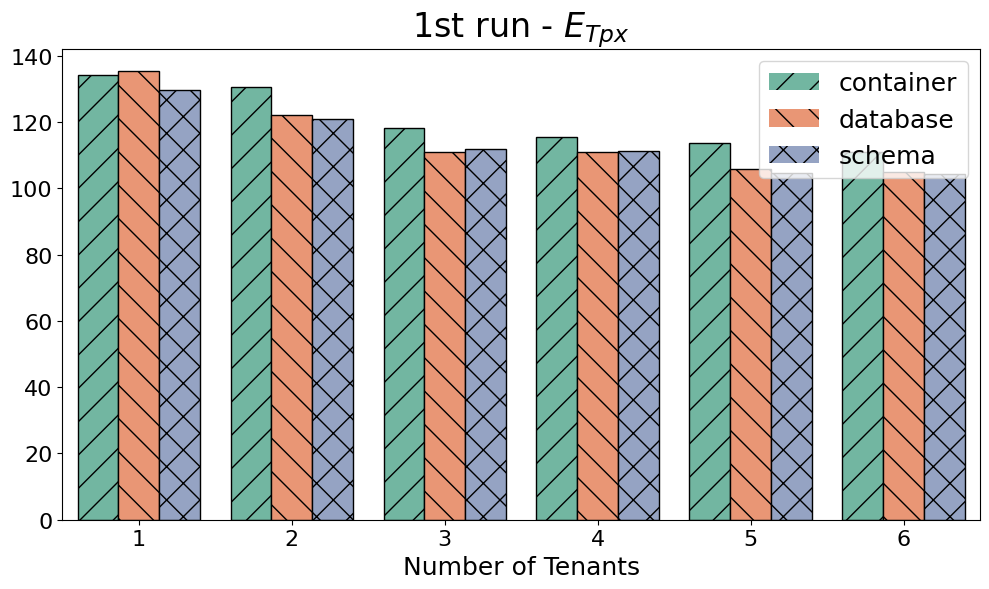

In [46]:
plot_bars(merged_df, y='E_Tpx', title='1st run - $E_{Tpx}$', estimator='max')

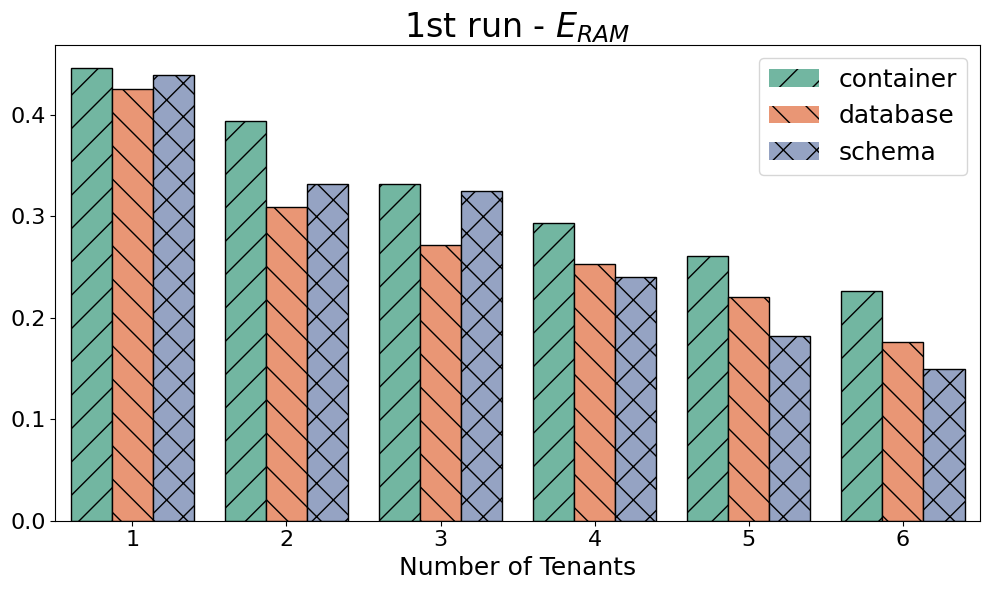

In [47]:
plot_bars(merged_df, y='E_RAM', title='1st run - $E_{RAM}$', estimator='min')

In [48]:
client = '2'

df_performance_monitoring = collect.get_monitoring_all(type="stream")
df_performance_monitoring = df_performance_monitoring[df_performance_monitoring['client'] == client]
df_performance = collect.get_performance_all()
df_performance = df_performance[df_performance['client'] == client]
merged_df = pd.merge(df_performance, df_performance_monitoring, on=['type', 'num_tenants', 'code', 'client'], how='inner')
#merged_df['CPUs/Request'] = merged_df['CPU [CPUs]'] / merged_df['Goodput (requests/second)'] / 600.
merged_df['E_Tpx'] = merged_df['Goodput (requests/second)'] / merged_df['CPU Utilization Time [s]'] * 600.
merged_df['E_Lat'] = 1./np.sqrt(merged_df['Latency Distribution.Average Latency (microseconds)']*merged_df['CPU Utilization Time [s]']/1E6)
merged_df['E_RAM'] = (merged_df['Goodput (requests/second)']) / merged_df['Memory Usage [MiB]']

merged_df

client  Goodput (requests/second)  num_errors  \
0       2                4336.264926         194   
1       2                4355.929949         189   
2       2                4206.203295         208   
3       2                7505.072435         376   
4       2                4002.014821         187   
5       2                3853.533204         201   
6       2                9857.203203         563   
7       2                4597.114060         217   
8       2                4354.116598         193   
9       2               10565.652128         540   
10      2                4293.764914         207   
11      2                4350.585698         161   
12      2               11379.105620         665   
13      2                3760.305679         134   
14      2                3610.468266         121   
15      2               11533.980586         691   
16      2                3936.523221         121   
17      2                3510.841556         118   

    Latency Distribution.Average Latency (microseconds)  \
0                                          22645.000000   
1                                          22537.000000   
2                                          23327.000000   
3                                          26173.500000   
4                                          49091.000000   
5                                          50956.000000   
6                                          29897.666667   
7                                          64104.000000   
8                                          67729.666667   
9                                          37187.750000   
10                                         91605.000000   
11                                         90430.250000   
12                                         43187.400000   
13                                        130850.400000   
14                                        136308.800000   
15                                         51100.666667   
16                                        149995.833333   
17                                        168271.500000   

    Latency Distribution.99th Percentile Latency (microseconds)       type  \
0                                                        375195  container   
1                                                        381814   database   
2                                                        361689     schema   
3                                                        335985  container   
4                                                        910390   database   
5                                                        978458     schema   
6                                                        336775  container   
7                                                        907077   database   
8                                                        926463     schema   
9                                                        294799  container   
10                                                      1135303   database   
11                                                      1027288     schema   
12                                                       440986  container   
13                                                      1366445   database   
14                                                      1402638     schema   
15                                                       547859  container   
16                                                      1462252   database   
17                                                      1588828     schema   

    num_tenants        code  Memory Usage [MiB]  Memory Usage Cached [MiB]  \
0             1  1755712809            14915.16                   30144.54   
1             1  1755709687            14696.05                   28908.07   
2             1  1755706475            14919.49                   28658.81   
3             2  1755768953            27661.70                   56105.18   
4             2  17

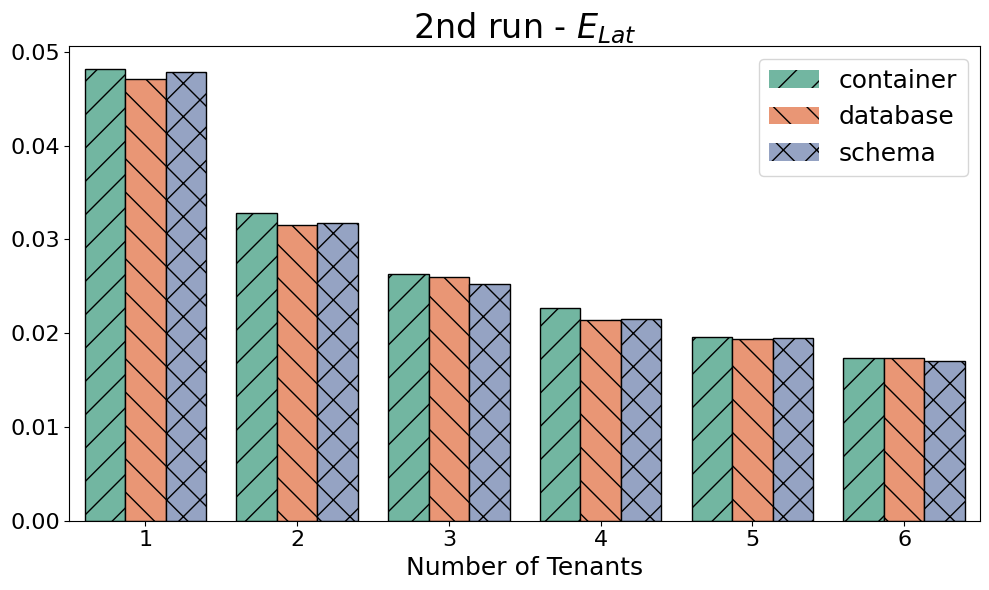

In [49]:
plot_bars(merged_df, y='E_Lat', title='2nd run - $E_{Lat}$', estimator='max')

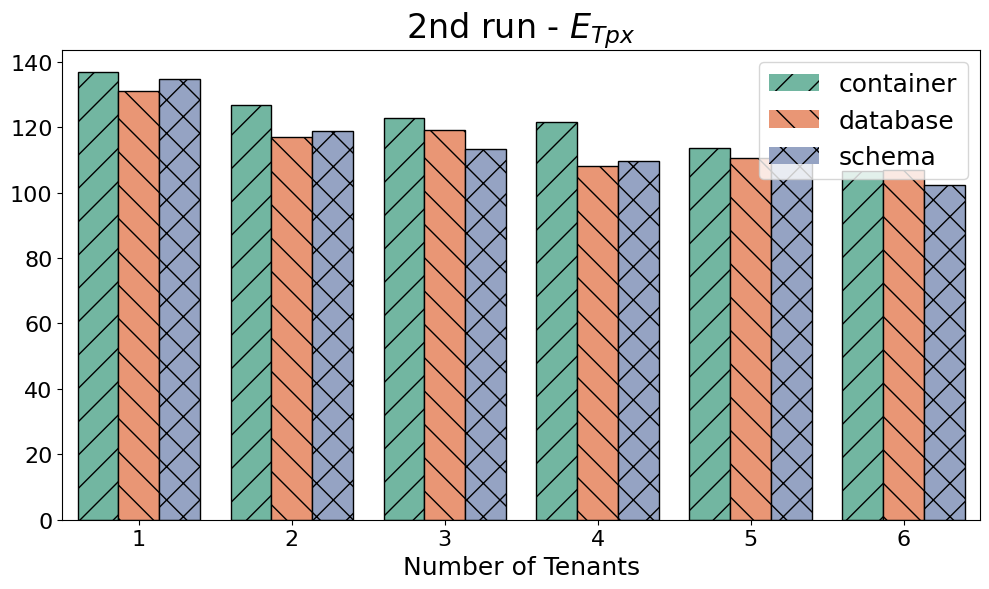

In [50]:
plot_bars(merged_df, y='E_Tpx', title='2nd run - $E_{Tpx}$', estimator='max')

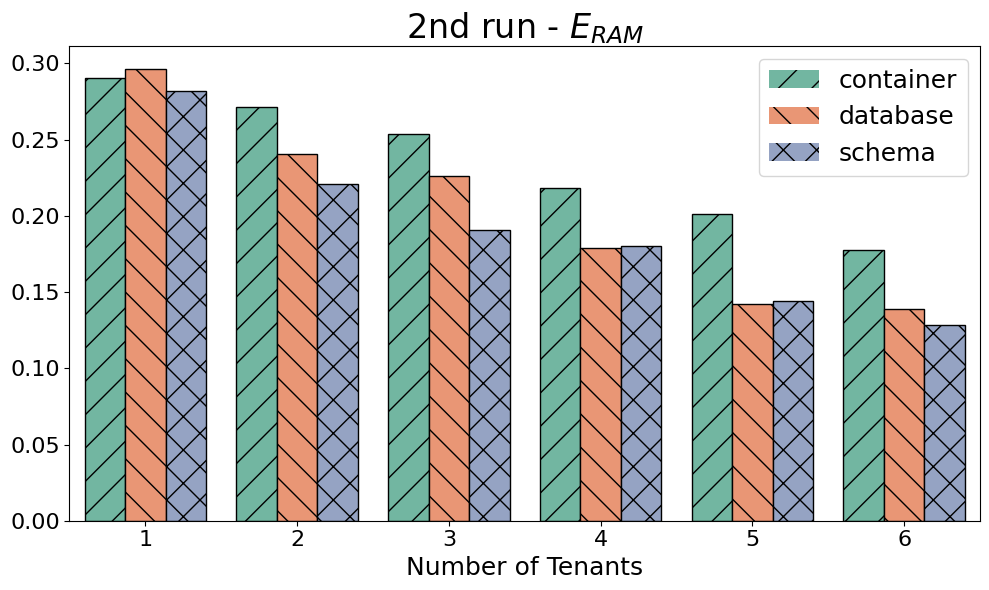

In [51]:
plot_bars(merged_df, y='E_RAM', title='2nd run - $E_{RAM}$', estimator='max')

In [52]:
import os
import zipfile

def zip_all_results():
    # Set the base directory containing the folders
    base_dir = path # "/path/to/your/folders"  # CHANGE THIS to your actual directory
    # List all folder names in the directory
    folder_names = codes
    # Create a zip for each folder
    for folder in folder_names:
        folder_path = os.path.join(base_dir, folder)
        zip_path = os.path.join(base_dir, f"{folder}.zip")
        print(f"Zipping {folder_path} to {zip_path}...")
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, _, files in os.walk(folder_path):
                for file in files:
                    abs_path = os.path.join(root, file)
                    rel_path = os.path.relpath(abs_path, folder_path)
                    zipf.write(abs_path, arcname=os.path.join(folder, rel_path))
    print("✅ Done zipping all folders.")


In [53]:
#zip_all_results()